In [153]:
import numpy as np
import pandas as pd
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import r2_score



In [2]:
df1 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv')
df2 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Crops production indicators - FAOSTAT_data_en_2-22-2024.csv')
df3 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Emissions - FAOSTAT_data_en_2-27-2024.csv')
df4 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Employment - FAOSTAT_data_en_2-27-2024.csv')
df5 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Exchange rate - FAOSTAT_data_en_2-22-2024.csv')
df6 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')
df7 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')
df8 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')
df9 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')
df10 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')
df11 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Land temperature change - FAOSTAT_data_en_2-27-2024.csv')
df12 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv')
df13 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Pesticides use - FAOSTAT_data_en_2-27-2024.csv')

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/2478896122.py:12: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df12 = pd.read_csv('Desktop/ML/ML Coursework Dataset/Land use - FAOSTAT_data_en_2-22-2024.csv')


In [3]:
df1

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Element Code,Element,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,6125,Value,NaN,24.356332,I,Imputed value,base year is 2015
1,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7002,February,6125,Value,NaN,23.636242,I,Imputed value,base year is 2015
2,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7003,March,6125,Value,NaN,23.485345,I,Imputed value,base year is 2015
3,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7004,April,6125,Value,NaN,24.767194,I,Imputed value,base year is 2015
4,CP,Consumer Price Indices,4,Afghanistan,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7005,May,6125,Value,NaN,25.956912,I,Imputed value,base year is 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112885,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7005,May,6121,Value,%,116.960656,E,Estimated value,NaN
112886,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7006,June,6121,Value,%,255.596454,E,Estimated value,NaN
112887,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7007,July,6121,Value,%,103.098144,E,Estimated value,NaN
112888,CP,Consumer Price Indices,716,Zimbabwe,2023,2023,23014,Food price inflation,7008,August,6121,Value,%,70.758637,E,Estimated value,NaN


In [4]:
df1['Item'].unique()

array(['Consumer Prices, Food Indices (2015 = 100)',
       'Food price inflation'], dtype=object)

In [5]:
df1['Unit'].unique()

array([nan, '%'], dtype=object)

In [6]:
extracted_col_df1 = df1[['Area', 'Year', 'Item', 'Months', 'Value']]
extracted_col_df1

,Area,Year,Item,Months,Value
0,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",January,24.356332
1,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",February,23.636242
2,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",March,23.485345
3,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",April,24.767194
4,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",May,25.956912
...,...,...,...,...,...
112885,Zimbabwe,2023,Food price inflation,May,116.960656
112886,Zimbabwe,2023,Food price inflation,June,255.596454
112887,Zimbabwe,2023,Food price inflation,July,103.098144
112888,Zimbabwe,2023,Food price inflation,August,70.758637


In [7]:
annual_consumer_prices = extracted_col_df1.groupby(['Area', 'Year', 'Item'])['Value'].mean().reset_index()
annual_consumer_prices

,Area,Year,Item,Value
0,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",26.629848
1,Afghanistan,2001,"Consumer Prices, Food Indices (2015 = 100)",29.893548
2,Afghanistan,2001,Food price inflation,12.780692
3,Afghanistan,2002,"Consumer Prices, Food Indices (2015 = 100)",35.344892
4,Afghanistan,2002,Food price inflation,18.254516
...,...,...,...,...
9504,Åland Islands,2021,Food price inflation,1.164459
9505,Åland Islands,2022,"Consumer Prices, Food Indices (2015 = 100)",114.944128
9506,Åland Islands,2022,Food price inflation,9.678792
9507,Åland Islands,2023,"Consumer Prices, Food Indices (2015 = 100)",127.303080


In [8]:
# Filter the dataset to only include Food price inflation values
food_price_inflation_df1 = annual_consumer_prices[annual_consumer_prices['Item'] == 'Food price inflation']
food_price_inflation_df1

,Area,Year,Item,Value
2,Afghanistan,2001,Food price inflation,12.780692
4,Afghanistan,2002,Food price inflation,18.254516
6,Afghanistan,2003,Food price inflation,14.102244
8,Afghanistan,2004,Food price inflation,14.072172
10,Afghanistan,2005,Food price inflation,12.606240
...,...,...,...,...
9500,Åland Islands,2019,Food price inflation,1.797736
9502,Åland Islands,2020,Food price inflation,0.643114
9504,Åland Islands,2021,Food price inflation,1.164459
9506,Åland Islands,2022,Food price inflation,9.678792


In [9]:
# Rename columns for clarity
food_price_inflation_df1.columns = ['Area', 'Year', 'Item', 'Food price inflation Value']
food_price_inflation_df1.reset_index()

,index,Area,Year,Item,Food price inflation Value
0,2,Afghanistan,2001,Food price inflation,12.780692
1,4,Afghanistan,2002,Food price inflation,18.254516
2,6,Afghanistan,2003,Food price inflation,14.102244
3,8,Afghanistan,2004,Food price inflation,14.072172
4,10,Afghanistan,2005,Food price inflation,12.606240
...,...,...,...,...,...
4648,9500,Åland Islands,2019,Food price inflation,1.797736
4649,9502,Åland Islands,2020,Food price inflation,0.643114
4650,9504,Åland Islands,2021,Food price inflation,1.164459
4651,9506,Åland Islands,2022,Food price inflation,9.678792


In [10]:
# Filter the dataset to only include Consumer Prices index values
Consumer_Prices_df1 = annual_consumer_prices[annual_consumer_prices['Item'] == 'Consumer Prices, Food Indices (2015 = 100)']

# Rename columns for clarity
Consumer_Prices_df1.columns = ['Area', 'Year', 'Item', 'Consumer Prices Value']
Consumer_Prices_df1

,Area,Year,Item,Consumer Prices Value
0,Afghanistan,2000,"Consumer Prices, Food Indices (2015 = 100)",26.629848
1,Afghanistan,2001,"Consumer Prices, Food Indices (2015 = 100)",29.893548
3,Afghanistan,2002,"Consumer Prices, Food Indices (2015 = 100)",35.344892
5,Afghanistan,2003,"Consumer Prices, Food Indices (2015 = 100)",40.203113
7,Afghanistan,2004,"Consumer Prices, Food Indices (2015 = 100)",45.840561
...,...,...,...,...
9499,Åland Islands,2019,"Consumer Prices, Food Indices (2015 = 100)",102.928436
9501,Åland Islands,2020,"Consumer Prices, Food Indices (2015 = 100)",103.585137
9503,Åland Islands,2021,"Consumer Prices, Food Indices (2015 = 100)",104.784347
9505,Åland Islands,2022,"Consumer Prices, Food Indices (2015 = 100)",114.944128


In [11]:
Consumer_Prices_df1.drop(columns=['Item'], inplace=True)
Consumer_Prices_df1

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/2982229281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Consumer_Prices_df1.drop(columns=['Item'], inplace=True)


,Area,Year,Consumer Prices Value
0,Afghanistan,2000,26.629848
1,Afghanistan,2001,29.893548
3,Afghanistan,2002,35.344892
5,Afghanistan,2003,40.203113
7,Afghanistan,2004,45.840561
...,...,...,...
9499,Åland Islands,2019,102.928436
9501,Åland Islands,2020,103.585137
9503,Åland Islands,2021,104.784347
9505,Åland Islands,2022,114.944128


In [12]:
food_price_inflation_df1.drop(columns=['Item'], inplace=True)
food_price_inflation_df1

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/1820726334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_price_inflation_df1.drop(columns=['Item'], inplace=True)


,Area,Year,Food price inflation Value
2,Afghanistan,2001,12.780692
4,Afghanistan,2002,18.254516
6,Afghanistan,2003,14.102244
8,Afghanistan,2004,14.072172
10,Afghanistan,2005,12.606240
...,...,...,...
9500,Åland Islands,2019,1.797736
9502,Åland Islands,2020,0.643114
9504,Åland Islands,2021,1.164459
9506,Åland Islands,2022,9.678792


In [13]:
df1_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), [food_price_inflation_df1, Consumer_Prices_df1])


df1_merged

,Area,Year,Food price inflation Value,Consumer Prices Value
0,Afghanistan,2001,12.780692,29.893548
1,Afghanistan,2002,18.254516,35.344892
2,Afghanistan,2003,14.102244,40.203113
3,Afghanistan,2004,14.072172,45.840561
4,Afghanistan,2005,12.606240,51.605262
...,...,...,...,...
4851,Viet Nam,2000,NaN,25.217748
4852,Yemen,2000,NaN,13.849418
4853,Zambia,2000,NaN,20.171457
4854,Zimbabwe,2000,NaN,90.382902


In [14]:
# Assess missing data
missing_data_df1 = df1_merged.isnull().sum().sort_values(ascending=False)
missing_data_df1


Food price inflation Value    203
Area                            0
Year                            0
Consumer Prices Value           0
dtype: int64

In [15]:
df2

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2000,2000,100 g/ha,8063,A,Official figure,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2001,2001,100 g/ha,10067,A,Official figure,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2002,2002,100 g/ha,16698,A,Official figure,NaN
3,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2003,2003,100 g/ha,14580,A,Official figure,NaN
4,QCL,Crops and livestock products,4,Afghanistan,5419,Yield,F1717,"Cereals, primary",2004,2004,100 g/ha,13348,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41644,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2018,2018,100 g/ha,66518,E,Estimated value,NaN
41645,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2019,2019,100 g/ha,64830,E,Estimated value,NaN
41646,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2020,2020,100 g/ha,65628,E,Estimated value,NaN
41647,QCL,Crops and livestock products,716,Zimbabwe,5419,Yield,F1735,Vegetables Primary,2021,2021,100 g/ha,66126,E,Estimated value,NaN


In [16]:
df2['Element'].unique()

array(['Yield'], dtype=object)

In [17]:
df2['Item'].unique()

array(['Cereals, primary', 'Citrus Fruit, Total',
       'Fibre Crops, Fibre Equivalent', 'Fruit Primary',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Pulses, Total', 'Roots and Tubers, Total', 'Sugar Crops Primary',
       'Treenuts, Total', 'Vegetables Primary'], dtype=object)

In [18]:
df2['Domain'].unique()

array(['Crops and livestock products'], dtype=object)

In [20]:
extracted_col_df2 = df2[['Area', 'Year', 'Item', 'Value']]
extracted_col_df2

,Area,Year,Item,Value
0,Afghanistan,2000,"Cereals, primary",8063
1,Afghanistan,2001,"Cereals, primary",10067
2,Afghanistan,2002,"Cereals, primary",16698
3,Afghanistan,2003,"Cereals, primary",14580
4,Afghanistan,2004,"Cereals, primary",13348
...,...,...,...,...
41644,Zimbabwe,2018,Vegetables Primary,66518
41645,Zimbabwe,2019,Vegetables Primary,64830
41646,Zimbabwe,2020,Vegetables Primary,65628
41647,Zimbabwe,2021,Vegetables Primary,66126


In [21]:
# Rename columns for clarity
extracted_col_df2.columns = ['Area', 'Year', 'Item', 'Yield Value']

# Group by 'Area' and 'Year' and sum 'Yield Value'
summed_yield_values_df2 = extracted_col_df2.groupby(['Area', 'Year'])['Yield Value'].sum().reset_index()
summed_yield_values_df2

,Area,Year,Yield Value
0,Afghanistan,2000,661957
1,Afghanistan,2001,667714
2,Afghanistan,2002,672489
3,Afghanistan,2003,673301
4,Afghanistan,2004,675944
...,...,...,...
4582,Zimbabwe,2018,1099976
4583,Zimbabwe,2019,1070311
4584,Zimbabwe,2020,1061712
4585,Zimbabwe,2021,1050425


In [22]:
df3

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,0.7056,E,Estimated value,NaN
1,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2000,2000,3050,FAO TIER 1,kt,20.8471,E,Estimated value,NaN
2,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,0.7054,E,Estimated value,NaN
3,GCE,Emissions from Crops,4,Afghanistan,72440,Crops total (Emissions CH4),F1712,All Crops,2001,2001,3050,FAO TIER 1,kt,19.2605,E,Estimated value,NaN
4,GCE,Emissions from Crops,4,Afghanistan,72430,Crops total (Emissions N2O),F1712,All Crops,2002,2002,3050,FAO TIER 1,kt,1.0656,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28905,GV,Emissions from Drained organic soils,716,Zimbabwe,7273,Emissions (CO2),6728,Grassland organic soils,2019,2019,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
28906,GV,Emissions from Drained organic soils,716,Zimbabwe,7230,Emissions (N2O),6728,Grassland organic soils,2020,2020,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
28907,GV,Emissions from Drained organic soils,716,Zimbabwe,7273,Emissions (CO2),6728,Grassland organic soils,2020,2020,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN
28908,GV,Emissions from Drained organic soils,716,Zimbabwe,7230,Emissions (N2O),6728,Grassland organic soils,2021,2021,3050,FAO TIER 1,kt,0.0000,E,Estimated value,NaN


In [23]:
df3['Element'].unique()

array(['Crops total (Emissions N2O)', 'Crops total (Emissions CH4)',
       'Emissions (N2O)', 'Emissions (CO2)'], dtype=object)

In [24]:
df3['Item'].unique()

array(['All Crops', 'Cropland organic soils', 'Grassland organic soils'],
      dtype=object)

In [25]:
df3['Unit'].unique()

array(['kt'], dtype=object)

In [26]:
df3['Element'].unique()

array(['Crops total (Emissions N2O)', 'Crops total (Emissions CH4)',
       'Emissions (N2O)', 'Emissions (CO2)'], dtype=object)

In [27]:
extracted_col_df3 = df3[['Area', 'Year', 'Element', 'Item', 'Value' ]]
extracted_col_df3.head(100)

,Area,Year,Element,Item,Value
0,Afghanistan,2000,Crops total (Emissions N2O),All Crops,0.7056
1,Afghanistan,2000,Crops total (Emissions CH4),All Crops,20.8471
2,Afghanistan,2001,Crops total (Emissions N2O),All Crops,0.7054
3,Afghanistan,2001,Crops total (Emissions CH4),All Crops,19.2605
4,Afghanistan,2002,Crops total (Emissions N2O),All Crops,1.0656
...,...,...,...,...,...
95,Algeria,2003,Crops total (Emissions CH4),All Crops,2.3051
96,Algeria,2004,Crops total (Emissions N2O),All Crops,1.2668
97,Algeria,2004,Crops total (Emissions CH4),All Crops,2.2624
98,Algeria,2005,Crops total (Emissions N2O),All Crops,1.0970


In [28]:
# Pivot the DataFrame to create separate columns for each Element-Item combination
pivot_df3 = df3.pivot_table(index=['Area', 'Year'],
                            columns=['Element', 'Item'],
                            values='Value',
                            aggfunc='sum').reset_index()

# Flatten the MultiIndex columns (optional but makes the DataFrame easier to work with)
pivot_df3.columns = [''.join(col).strip() for col in pivot_df3.columns.values]
pivot_df3

,Area,Year,Crops total (Emissions CH4)All Crops,Crops total (Emissions N2O)All Crops,Emissions (CO2)Cropland organic soils,Emissions (CO2)Grassland organic soils,Emissions (N2O)Cropland organic soils,Emissions (N2O)Grassland organic soils
0,Afghanistan,2000,20.8471,0.7056,0.0,0.0,0.0,0.0
1,Afghanistan,2001,19.2605,0.7054,0.0,0.0,0.0,0.0
2,Afghanistan,2002,21.2553,1.0656,0.0,0.0,0.0,0.0
3,Afghanistan,2003,23.7017,1.3117,0.0,0.0,0.0,0.0
4,Afghanistan,2004,30.3089,1.0856,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
5125,Zimbabwe,2017,3.3189,0.4894,0.0,0.0,0.0,0.0
5126,Zimbabwe,2018,3.4567,0.4981,0.0,0.0,0.0,0.0
5127,Zimbabwe,2019,2.9643,0.3744,0.0,0.0,0.0,0.0
5128,Zimbabwe,2020,2.9716,0.4938,0.0,0.0,0.0,0.0


In [30]:
df5

,Domain Code,Domain,Area Code (M49),Area,ISO Currency Code (FAO),Currency,Element Code,Element,Year Code,Year,Months Code,Months,Unit,Value,Flag,Flag Description
0,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7001,January,NaN,44.129167,X,Figure from international organizations
1,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7002,February,NaN,44.129167,X,Figure from international organizations
2,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7003,March,NaN,44.129167,X,Figure from international organizations
3,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7004,April,NaN,44.129167,X,Figure from international organizations
4,PE,Exchange rates,4,Afghanistan,AFA,Afghani,LCU,Local currency units per USD,1980,1980,7005,May,NaN,44.129167,X,Figure from international organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103271,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7009,September,NaN,597.970000,X,Figure from international organizations
103272,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2022,2022,7010,October,NaN,628.716452,X,Figure from international organizations
103273,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7004,April,NaN,981.370229,X,Figure from international organizations
103274,PE,Exchange rates,716,Zimbabwe,ZWD,Zimbabwe Dollar (old),LCU,Local currency units per USD,2023,2023,7005,May,NaN,1439.613438,X,Figure from international organizations


In [31]:
df5['Unit'].unique()

array([nan])

In [32]:
df5['Element'].unique()

array(['Local currency units per USD'], dtype=object)

In [33]:
extracted_col_df5 = df5[['Area', 'Year', 'Months', 'Value' ]]
extracted_col_df5

,Area,Year,Months,Value
0,Afghanistan,1980,January,44.129167
1,Afghanistan,1980,February,44.129167
2,Afghanistan,1980,March,44.129167
3,Afghanistan,1980,April,44.129167
4,Afghanistan,1980,May,44.129167
...,...,...,...,...
103271,Zimbabwe,2022,September,597.970000
103272,Zimbabwe,2022,October,628.716452
103273,Zimbabwe,2023,April,981.370229
103274,Zimbabwe,2023,May,1439.613438


In [35]:
yearly_exchange_rate = extracted_col_df5.groupby(['Area', 'Year'])['Value'].mean().reset_index()
# Rename columns for clarity
yearly_exchange_rate.columns = ['Area', 'Year', 'Exchange Value']
yearly_exchange_rate

,Area,Year,Exchange Value
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606
...,...,...,...
8634,Åland Islands,2019,0.893288
8635,Åland Islands,2020,0.877475
8636,Åland Islands,2021,0.845377
8637,Åland Islands,2022,0.950916


In [36]:
df6

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2002,2002,t,17900.00,I,Imputed value
1,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2003,2003,t,33200.00,I,Imputed value
2,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4021,NPK fertilizers,2004,2004,t,47700.00,I,Imputed value
3,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2004,2004,t,42300.00,I,Imputed value
4,RFB,Fertilizers by Product,4,Afghanistan,5157,Agricultural Use,4001,Urea,2005,2005,t,20577.00,I,Imputed value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17802,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2004,2004,t,5.00,I,Imputed value
17803,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2008,2008,t,2.13,I,Imputed value
17804,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2009,2009,t,9.00,I,Imputed value
17805,RFB,Fertilizers by Product,716,Zimbabwe,5157,Agricultural Use,4006,Urea and ammonium nitrate solutions (UAN),2010,2010,t,4971.00,I,Imputed value


In [37]:
df6['Element'].unique()

array(['Agricultural Use'], dtype=object)

In [38]:
df6['Item'].unique()

array(['NPK fertilizers', 'Urea', 'Ammonium nitrate (AN)',
       'Ammonium sulphate',
       'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
       'Diammonium phosphate (DAP)', 'Monoammonium phosphate (MAP)',
       'Other NP compounds', 'PK compounds',
       'Potassium chloride (muriate of potash) (MOP)',
       'Potassium nitrate',
       'Potassium sulphate (sulphate of potash) (SOP)', 'Sodium nitrate',
       'Superphosphates above 35%', 'Superphosphates, other',
       'Ammonia, anhydrous', 'Phosphate rock',
       'Urea and ammonium nitrate solutions (UAN)', 'Fertilizers n.e.c.',
       'Other nitrogenous fertilizers, n.e.c.',
       'Other phosphatic fertilizers, n.e.c.',
       'Other potassic fertilizers, n.e.c.', 'Other NK compounds'],
      dtype=object)

In [39]:
df6['Unit'].unique()

array(['t'], dtype=object)

In [40]:
extracted_col_df6 = df6[['Area', 'Year', 'Item', 'Value' ]]
extracted_col_df6

,Area,Year,Item,Value
0,Afghanistan,2002,NPK fertilizers,17900.00
1,Afghanistan,2003,NPK fertilizers,33200.00
2,Afghanistan,2004,NPK fertilizers,47700.00
3,Afghanistan,2004,Urea,42300.00
4,Afghanistan,2005,Urea,20577.00
...,...,...,...,...
17802,Zimbabwe,2004,Urea and ammonium nitrate solutions (UAN),5.00
17803,Zimbabwe,2008,Urea and ammonium nitrate solutions (UAN),2.13
17804,Zimbabwe,2009,Urea and ammonium nitrate solutions (UAN),9.00
17805,Zimbabwe,2010,Urea and ammonium nitrate solutions (UAN),4971.00


In [41]:
# Define the classification dictionary
fertilizer_types = {
    'Nitrogenous Fertilizers': [
        'NPK fertilizers', 'Urea', 'Ammonium nitrate (AN)', 'Ammonium sulphate',
        'Calcium ammonium nitrate (CAN) and other mixtures with calcium carbonate',
        'Urea and ammonium nitrate solutions (UAN)', 'Other nitrogenous fertilizers, n.e.c.',
        'Ammonia, anhydrous'
    ],
    'Phosphatic Fertilizers': [
        'Diammonium phosphate (DAP)', 'Monoammonium phosphate (MAP)',
        'Superphosphates above 35%', 'Superphosphates, other',
        'Other phosphatic fertilizers, n.e.c.', 'Phosphate rock'
    ],
    'Potassic Fertilizers': [
        'Potassium chloride (muriate of potash) (MOP)', 'Potassium nitrate',
        'Potassium sulphate (sulphate of potash) (SOP)', 'Other potassic fertilizers, n.e.c.'
    ],
    'Compound Fertilizers': [
        'Other NP compounds', 'PK compounds', 'Other NK compounds'
    ],
    'Miscellaneous': [
        'Fertilizers n.e.c.', 'Sodium nitrate'
    ]
}

# Create a reverse dictionary to map each item to its category
item_to_type = {item: category for category, items in fertilizer_types.items() for item in items}


In [42]:
extracted_col_df6['Fertilizer Type'] = extracted_col_df6['Item'].map(item_to_type)
extracted_col_df6

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/3567974364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_col_df6['Fertilizer Type'] = extracted_col_df6['Item'].map(item_to_type)


,Area,Year,Item,Value,Fertilizer Type
0,Afghanistan,2002,NPK fertilizers,17900.00,Nitrogenous Fertilizers
1,Afghanistan,2003,NPK fertilizers,33200.00,Nitrogenous Fertilizers
2,Afghanistan,2004,NPK fertilizers,47700.00,Nitrogenous Fertilizers
3,Afghanistan,2004,Urea,42300.00,Nitrogenous Fertilizers
4,Afghanistan,2005,Urea,20577.00,Nitrogenous Fertilizers
...,...,...,...,...,...
17802,Zimbabwe,2004,Urea and ammonium nitrate solutions (UAN),5.00,Nitrogenous Fertilizers
17803,Zimbabwe,2008,Urea and ammonium nitrate solutions (UAN),2.13,Nitrogenous Fertilizers
17804,Zimbabwe,2009,Urea and ammonium nitrate solutions (UAN),9.00,Nitrogenous Fertilizers
17805,Zimbabwe,2010,Urea and ammonium nitrate solutions (UAN),4971.00,Nitrogenous Fertilizers


In [43]:
extracted_col_df6['Fertilizer Type'].unique()

array(['Nitrogenous Fertilizers', 'Phosphatic Fertilizers',
       'Compound Fertilizers', 'Potassic Fertilizers', 'Miscellaneous'],
      dtype=object)

In [44]:
# Group by Fertilizer Type, Area, and Year, and sum the Value
grouped_fertilizers = extracted_col_df6.groupby(['Area', 'Year', 'Fertilizer Type'])['Value'].sum().reset_index()
grouped_fertilizers

,Area,Year,Fertilizer Type,Value
0,Afghanistan,2002,Nitrogenous Fertilizers,17900.00
1,Afghanistan,2003,Nitrogenous Fertilizers,33200.00
2,Afghanistan,2004,Nitrogenous Fertilizers,90000.00
3,Afghanistan,2005,Nitrogenous Fertilizers,20577.00
4,Afghanistan,2006,Nitrogenous Fertilizers,68253.00
...,...,...,...,...
6412,Zimbabwe,2011,Nitrogenous Fertilizers,67449.00
6413,Zimbabwe,2011,Phosphatic Fertilizers,30368.00
6414,Zimbabwe,2011,Potassic Fertilizers,17804.00
6415,Zimbabwe,2017,Miscellaneous,10817.00


In [45]:
# Pivot the DataFrame to create separate columns for each Element-Item combination
pivot_df6 = grouped_fertilizers.pivot_table(index=['Area', 'Year'],
                            columns=['Fertilizer Type'],
                            values='Value',
                            aggfunc='sum').reset_index()

# Flatten the MultiIndex columns
pivot_df6.columns = [''.join(col).strip() for col in pivot_df6.columns.values]
pivot_df6

,Area,Year,Compound Fertilizers,Miscellaneous,Nitrogenous Fertilizers,Phosphatic Fertilizers,Potassic Fertilizers
0,Afghanistan,2002,NaN,NaN,17900.0,NaN,NaN
1,Afghanistan,2003,NaN,NaN,33200.0,NaN,NaN
2,Afghanistan,2004,NaN,NaN,90000.0,NaN,NaN
3,Afghanistan,2005,NaN,NaN,20577.0,NaN,NaN
4,Afghanistan,2006,NaN,NaN,68253.0,NaN,NaN
...,...,...,...,...,...,...,...
1928,Zimbabwe,2009,217.0,NaN,116676.0,9758.0,2385.0
1929,Zimbabwe,2010,46058.0,NaN,76754.0,17131.0,24294.0
1930,Zimbabwe,2011,18477.0,NaN,67449.0,30368.0,17804.0
1931,Zimbabwe,2017,NaN,10817.00,NaN,NaN,NaN


In [46]:
df7

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FBS),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2010,2010,1000 t,2000.00,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2011,2011,1000 t,2448.00,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2012,2012,1000 t,2001.00,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2013,2013,1000 t,2155.00,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,5611,Import Quantity,S2905,Cereals - Excluding Beer,2014,2014,1000 t,1840.00,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148036,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2017,2017,1000 t,57.96,E,Estimated value
148037,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2018,2018,1000 t,46.91,E,Estimated value
148038,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2019,2019,1000 t,31.08,E,Estimated value
148039,FBS,Food Balances (2010-),716,Zimbabwe,5142,Food,S2960,"Fish, Seafood",2020,2020,1000 t,31.08,E,Estimated value


In [47]:
df7['Element'].unique()

array(['Import Quantity', 'Export Quantity', 'Losses',
       'Other uses (non-food)', 'Food'], dtype=object)

In [48]:
df7['Item'].unique()

array(['Cereals - Excluding Beer', 'Starchy Roots', 'Sugar Crops',
       'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
       'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
       'Stimulants', 'Spices', 'Alcoholic Beverages', 'Meat', 'Eggs',
       'Milk - Excluding Butter', 'Fish, Seafood'], dtype=object)

In [49]:
df7['Unit'].unique()

array(['1000 t'], dtype=object)

In [50]:
extracted_col_df7 = df7[['Area', 'Year', 'Element', 'Item', 'Value' ]]
extracted_col_df7

,Area,Year,Element,Item,Value
0,Afghanistan,2010,Import Quantity,Cereals - Excluding Beer,2000.00
1,Afghanistan,2011,Import Quantity,Cereals - Excluding Beer,2448.00
2,Afghanistan,2012,Import Quantity,Cereals - Excluding Beer,2001.00
3,Afghanistan,2013,Import Quantity,Cereals - Excluding Beer,2155.00
4,Afghanistan,2014,Import Quantity,Cereals - Excluding Beer,1840.00
...,...,...,...,...,...
148036,Zimbabwe,2017,Food,"Fish, Seafood",57.96
148037,Zimbabwe,2018,Food,"Fish, Seafood",46.91
148038,Zimbabwe,2019,Food,"Fish, Seafood",31.08
148039,Zimbabwe,2020,Food,"Fish, Seafood",31.08


In [51]:
# List of crop-related items to keep
crop_items_df7 = [
    'Cereals - Excluding Beer', 'Starchy Roots',
    'Sugar Crops', 'Sugar & Sweeteners', 'Pulses', 'Treenuts', 'Oilcrops',
    'Vegetable Oils', 'Vegetables', 'Fruits - Excluding Wine',
    'Stimulants', 'Spices'
]

In [52]:
# Filter the DataFrame to include only the crop-related items
filtered_crop_item_df7 = extracted_col_df7[extracted_col_df7['Item'].isin(crop_items_df7)]
filtered_crop_item_df7.reset_index()

,index,Area,Year,Element,Item,Value
0,0,Afghanistan,2010,Import Quantity,Cereals - Excluding Beer,2000.0
1,1,Afghanistan,2011,Import Quantity,Cereals - Excluding Beer,2448.0
2,2,Afghanistan,2012,Import Quantity,Cereals - Excluding Beer,2001.0
3,3,Afghanistan,2013,Import Quantity,Cereals - Excluding Beer,2155.0
4,4,Afghanistan,2014,Import Quantity,Cereals - Excluding Beer,1840.0
...,...,...,...,...,...,...
104960,147816,Zimbabwe,2017,Food,Spices,1.0
104961,147817,Zimbabwe,2018,Food,Spices,2.0
104962,147818,Zimbabwe,2019,Food,Spices,2.0
104963,147819,Zimbabwe,2020,Food,Spices,2.0


In [53]:
# Filter the dataset to only include import quantity
import_quantity_df7 = filtered_crop_item_df7[filtered_crop_item_df7['Element'] == 'Import Quantity']
import_quantity_df7

,Area,Year,Element,Item,Value
0,Afghanistan,2010,Import Quantity,Cereals - Excluding Beer,2000.0
1,Afghanistan,2011,Import Quantity,Cereals - Excluding Beer,2448.0
2,Afghanistan,2012,Import Quantity,Cereals - Excluding Beer,2001.0
3,Afghanistan,2013,Import Quantity,Cereals - Excluding Beer,2155.0
4,Afghanistan,2014,Import Quantity,Cereals - Excluding Beer,1840.0
...,...,...,...,...,...
147780,Zimbabwe,2017,Import Quantity,Spices,1.0
147781,Zimbabwe,2018,Import Quantity,Spices,0.0
147782,Zimbabwe,2019,Import Quantity,Spices,0.0
147783,Zimbabwe,2020,Import Quantity,Spices,0.0


In [54]:
# Sum import quantity values for each area and year across all crop items
import_quantity_sums_df7 = import_quantity_df7.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
import_quantity_sums_df7.columns = ['Area', 'Year', 'Total Import Quantity']
import_quantity_sums_df7

,Area,Year,Total Import Quantity
0,Afghanistan,2010,2928.0
1,Afghanistan,2011,3568.0
2,Afghanistan,2012,3461.0
3,Afghanistan,2013,3614.0
4,Afghanistan,2014,3755.0
...,...,...,...
2171,Zimbabwe,2017,1237.0
2172,Zimbabwe,2018,1051.0
2173,Zimbabwe,2019,845.0
2174,Zimbabwe,2020,2071.0


In [55]:
# Filter the dataset to only include export quantity
export_quantity_df7 = filtered_crop_item_df7[filtered_crop_item_df7['Element'] == 'Export Quantity']
# Sum export quantity values for each area and year across all crop items
export_quantity_sums_df7 = export_quantity_df7.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
export_quantity_sums_df7.columns = ['Area', 'Year', 'Total Export Quantity']
export_quantity_sums_df7

,Area,Year,Total Export Quantity
0,Afghanistan,2010,360.0
1,Afghanistan,2011,277.0
2,Afghanistan,2012,198.0
3,Afghanistan,2013,281.0
4,Afghanistan,2014,412.0
...,...,...,...
2171,Zimbabwe,2017,207.0
2172,Zimbabwe,2018,209.0
2173,Zimbabwe,2019,280.0
2174,Zimbabwe,2020,304.0


In [56]:
# Filter the dataset to only include losses quantity
losses_quantity_df7 = filtered_crop_item_df7[filtered_crop_item_df7['Element'] == 'Losses']
losses_quantity_df7

,Area,Year,Element,Item,Value
24,Afghanistan,2010,Losses,Cereals - Excluding Beer,837.0
25,Afghanistan,2011,Losses,Cereals - Excluding Beer,647.0
26,Afghanistan,2012,Losses,Cereals - Excluding Beer,911.0
27,Afghanistan,2013,Losses,Cereals - Excluding Beer,936.0
28,Afghanistan,2014,Losses,Cereals - Excluding Beer,963.0
...,...,...,...,...,...
147804,Zimbabwe,2017,Losses,Spices,0.0
147805,Zimbabwe,2018,Losses,Spices,0.0
147806,Zimbabwe,2019,Losses,Spices,0.0
147807,Zimbabwe,2020,Losses,Spices,0.0


In [57]:
# Sum losses quantity values for each area and year across all crop items
losses_quantity_sums_df7 = losses_quantity_df7.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
losses_quantity_sums_df7.columns = ['Area', 'Year', 'Total losses Quantity']
losses_quantity_sums_df7

,Area,Year,Total losses Quantity
0,Afghanistan,2010,1090.0
1,Afghanistan,2011,866.0
2,Afghanistan,2012,1137.0
3,Afghanistan,2013,1168.0
4,Afghanistan,2014,1255.0
...,...,...,...
2171,Zimbabwe,2017,336.0
2172,Zimbabwe,2018,362.0
2173,Zimbabwe,2019,301.0
2174,Zimbabwe,2020,393.0


In [58]:
# Other uses (non-food)
# Filter the dataset to only include non-food quantity
non_food_quantity_df7 = filtered_crop_item_df7[filtered_crop_item_df7['Element'] == 'Other uses (non-food)']
non_food_quantity_df7

,Area,Year,Element,Item,Value
36,Afghanistan,2014,Other uses (non-food),Cereals - Excluding Beer,7.0
37,Afghanistan,2015,Other uses (non-food),Cereals - Excluding Beer,5.0
38,Afghanistan,2016,Other uses (non-food),Cereals - Excluding Beer,7.0
39,Afghanistan,2017,Other uses (non-food),Cereals - Excluding Beer,7.0
40,Afghanistan,2018,Other uses (non-food),Cereals - Excluding Beer,8.0
...,...,...,...,...,...
147708,Zimbabwe,2017,Other uses (non-food),Fruits - Excluding Wine,0.0
147709,Zimbabwe,2018,Other uses (non-food),Fruits - Excluding Wine,0.0
147710,Zimbabwe,2019,Other uses (non-food),Fruits - Excluding Wine,0.0
147711,Zimbabwe,2020,Other uses (non-food),Fruits - Excluding Wine,0.0


In [59]:
# Sum non-food quantity values for each area and year across all crop items
non_food_quantity_sums_df7 = non_food_quantity_df7.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
non_food_quantity_sums_df7.columns = ['Area', 'Year', 'Total non-food Quantity']
non_food_quantity_sums_df7

,Area,Year,Total non-food Quantity
0,Afghanistan,2010,215.0
1,Afghanistan,2011,257.0
2,Afghanistan,2012,442.0
3,Afghanistan,2013,428.0
4,Afghanistan,2014,27.0
...,...,...,...
2144,Zimbabwe,2017,46.0
2145,Zimbabwe,2018,59.0
2146,Zimbabwe,2019,14.0
2147,Zimbabwe,2020,53.0


In [60]:
# Filter the dataset to only include food quantity
food_quantity_df7 = filtered_crop_item_df7[filtered_crop_item_df7['Element'] == 'Food']
food_quantity_df7

,Area,Year,Element,Item,Value
44,Afghanistan,2010,Food,Cereals - Excluding Beer,5715.0
45,Afghanistan,2011,Food,Cereals - Excluding Beer,5771.0
46,Afghanistan,2012,Food,Cereals - Excluding Beer,5798.0
47,Afghanistan,2013,Food,Cereals - Excluding Beer,6090.0
48,Afghanistan,2014,Food,Cereals - Excluding Beer,6219.0
...,...,...,...,...,...
147816,Zimbabwe,2017,Food,Spices,1.0
147817,Zimbabwe,2018,Food,Spices,2.0
147818,Zimbabwe,2019,Food,Spices,2.0
147819,Zimbabwe,2020,Food,Spices,2.0


In [166]:

# Sum food quantity values for each area and year across all crop items
food_quantity_sums_df7 = food_quantity_df7.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
food_quantity_sums_df7.columns = ['Area', 'Year', 'Total Food Quantity']
food_quantity_sums_df7

,Area,Year,Total Food Quantity
0,Afghanistan,2010,8572.0
1,Afghanistan,2011,8694.0
2,Afghanistan,2012,9185.0
3,Afghanistan,2013,9639.0
4,Afghanistan,2014,10585.0
...,...,...,...
2171,Zimbabwe,2017,3300.0
2172,Zimbabwe,2018,3340.0
2173,Zimbabwe,2019,3252.0
2174,Zimbabwe,2020,3386.0


In [62]:
# merge all quantites
df7_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), 
                    [import_quantity_sums_df7 ,export_quantity_sums_df7 ,
                     losses_quantity_sums_df7 ,food_quantity_sums_df7, non_food_quantity_sums_df7])
df7_merged

,Area,Year,Total Import Quantity,Total Export Quantity,Total losses Quantity,Total Food Quantity,Total non-food Quantity
0,Afghanistan,2010,2928.0,360.0,1090.0,8572.0,215.0
1,Afghanistan,2011,3568.0,277.0,866.0,8694.0,257.0
2,Afghanistan,2012,3461.0,198.0,1137.0,9185.0,442.0
3,Afghanistan,2013,3614.0,281.0,1168.0,9639.0,428.0
4,Afghanistan,2014,3755.0,412.0,1255.0,10585.0,27.0
...,...,...,...,...,...,...,...
2171,Zimbabwe,2017,1237.0,207.0,336.0,3300.0,46.0
2172,Zimbabwe,2018,1051.0,209.0,362.0,3340.0,59.0
2173,Zimbabwe,2019,845.0,280.0,301.0,3252.0,14.0
2174,Zimbabwe,2020,2071.0,304.0,393.0,3386.0,53.0


In [63]:
df8

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,88.0,E,Estimated value,NaN
1,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,89.0,E,Estimated value,NaN
2,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,92.0,E,Estimated value,NaN
3,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,93.0,E,Estimated value,NaN
4,FS,Suite of Food Security Indicators,4,Afghanistan,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,94.0,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36507,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2016,2016,%,12.1,X,Figure from international organizations,NaN
36508,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2017,2017,%,12.0,X,Figure from international organizations,NaN
36509,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2018,2018,%,12.0,X,Figure from international organizations,NaN
36510,FS,Suite of Food Security Indicators,716,Zimbabwe,6121,Value,21049,Prevalence of low birthweight (percent),2019,2019,%,11.9,X,Figure from international organizations,NaN


In [64]:
df8['Year'].unique()

array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
       '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
       '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
       '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2019-2021',
       '2020-2022', '2000', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2001'],
      dtype=object)

In [65]:
df8['Domain'].unique()

array(['Suite of Food Security Indicators'], dtype=object)

In [66]:
df8['Element'].unique()

array(['Value'], dtype=object)

In [67]:
df8['Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
       'Political stability and absence of violence/terrorism (index)',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Prevalence of anemia among women of reproductive age (15-49 years)',
       'Prevalence of low birthweight (percent)'], dtype=object)

In [68]:
extracted_col_df8 = df8[['Area',  'Year',  'Item', 'Value']]
extracted_col_df8

,Area,Year,Item,Value
0,Afghanistan,2000-2002,Average dietary energy supply adequacy (percen...,88.0
1,Afghanistan,2001-2003,Average dietary energy supply adequacy (percen...,89.0
2,Afghanistan,2002-2004,Average dietary energy supply adequacy (percen...,92.0
3,Afghanistan,2003-2005,Average dietary energy supply adequacy (percen...,93.0
4,Afghanistan,2004-2006,Average dietary energy supply adequacy (percen...,94.0
...,...,...,...,...
36507,Zimbabwe,2016,Prevalence of low birthweight (percent),12.1
36508,Zimbabwe,2017,Prevalence of low birthweight (percent),12.0
36509,Zimbabwe,2018,Prevalence of low birthweight (percent),12.0
36510,Zimbabwe,2019,Prevalence of low birthweight (percent),11.9


In [69]:
extracted_col_df8['Year'] = extracted_col_df8['Year'].astype(str)
extracted_col_df8['Year'] = extracted_col_df8['Year'].str.split('-').str[0]
extracted_col_df8['Year'] = extracted_col_df8['Year'].astype(int)

add_row = []
for index, row in extracted_col_df8.iterrows():
    for i in range(1, 3):
        new_row = row.copy()
        new_row['Year'] = row['Year'] + i
        add_row.append(new_row)

add_data = pd.DataFrame(add_row)

extracted_col_df8 = pd.concat([extracted_col_df8, add_data], ignore_index=True)
extracted_col_df8 = extracted_col_df8.sort_values(by=['Area', 'Year'])

extracted_col_df8

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/3150513233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_col_df8['Year'] = extracted_col_df8['Year'].astype(str)
/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/3150513233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracted_col_df8['Year'] = extracted_col_df8['Year'].str.split('-').str[0]
/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/3150513233.py:3: SettingWithCopyWarning: 
A value

,Area,Year,Item,Value
0,Afghanistan,2000,Average dietary energy supply adequacy (percen...,88.00
21,Afghanistan,2000,Average protein supply (g/cap/day) (3-year ave...,51.40
40,Afghanistan,2000,Cereal import dependency ratio (percent) (3-ye...,34.10
59,Afghanistan,2000,Percent of arable land equipped for irrigation...,4.90
79,Afghanistan,2000,Value of food imports in total merchandise exp...,240.00
...,...,...,...,...
109451,Zimbabwe,2022,Per capita food supply variability (kcal/cap/day),20.00
109452,Zimbabwe,2022,Per capita food supply variability (kcal/cap/day),21.00
109535,Zimbabwe,2022,Prevalence of low birthweight (percent),11.80
109369,Zimbabwe,2023,Political stability and absence of violence/te...,-1.03


In [70]:
pivot_df8 = extracted_col_df8.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='mean').reset_index()

# Flatten the MultiIndex columns 
pivot_df8.columns = [''.join(col).strip() for col in pivot_df8.columns.values]


pivot_df8

,Area,Year,Average dietary energy supply adequacy (percent) (3-year average),Average protein supply (g/cap/day) (3-year average),Cereal import dependency ratio (percent) (3-year average),Per capita food production variability (constant 2014-2016 thousand int$ per capita),Per capita food supply variability (kcal/cap/day),Percent of arable land equipped for irrigation (percent) (3-year average),Political stability and absence of violence/terrorism (index),Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of low birthweight (percent),Value of food imports in total merchandise exports (percent) (3-year average)
0,Afghanistan,2000,88.000000,51.400000,34.100000,NaN,58.000000,4.9,-2.440000,35.700000,NaN,240.000000
1,Afghanistan,2001,88.500000,51.750000,31.700000,16.300000,52.500000,4.9,-2.440000,35.650000,NaN,260.500000
2,Afghanistan,2002,89.666667,52.500000,28.166667,18.650000,58.666667,4.9,-2.240000,35.566667,NaN,240.000000
3,Afghanistan,2003,91.333333,53.366667,22.966667,19.366667,63.333333,4.9,-2.120000,35.466667,NaN,222.333333
4,Afghanistan,2004,93.000000,53.866667,19.600000,19.700000,64.333333,4.9,-2.180000,35.433333,NaN,187.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4874,Zimbabwe,2019,91.333333,55.150000,58.600000,17.233333,45.000000,0.5,-0.796667,28.833333,11.966667,14.000000
4875,Zimbabwe,2020,91.000000,54.700000,60.300000,10.300000,31.666667,0.5,-0.916667,28.850000,11.900000,14.500000
4876,Zimbabwe,2021,91.000000,NaN,NaN,5.600000,21.000000,0.5,-1.020000,28.900000,11.850000,15.000000
4877,Zimbabwe,2022,91.000000,NaN,NaN,5.600000,20.500000,NaN,-1.050000,NaN,11.800000,NaN


In [71]:
extracted_col_df8.head(20)

,Area,Year,Item,Value
0,Afghanistan,2000,Average dietary energy supply adequacy (percen...,88.00
21,Afghanistan,2000,Average protein supply (g/cap/day) (3-year ave...,51.40
40,Afghanistan,2000,Cereal import dependency ratio (percent) (3-ye...,34.10
59,Afghanistan,2000,Percent of arable land equipped for irrigation...,4.90
79,Afghanistan,2000,Value of food imports in total merchandise exp...,240.00
99,Afghanistan,2000,Political stability and absence of violence/te...,-2.44
140,Afghanistan,2000,Per capita food supply variability (kcal/cap/day),58.00
162,Afghanistan,2000,Prevalence of anemia among women of reproducti...,35.70
1,Afghanistan,2001,Average dietary energy supply adequacy (percen...,89.00
22,Afghanistan,2001,Average protein supply (g/cap/day) (3-year ave...,52.10


In [72]:
df9

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1991,1991,1000 USD,41600.00,A,Official figure,NaN
1,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1992,1992,1000 USD,25600.00,E,Estimated value,NaN
2,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1993,1993,1000 USD,40000.00,E,Estimated value,NaN
3,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1994,1994,1000 USD,25700.00,E,Estimated value,NaN
4,TCL,Crops and livestock products,4,Afghanistan,5622,Import Value,F1888,Cereals and Preparations,1995,1995,1000 USD,37720.00,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141733,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2020,2020,1000 USD,794956.99,A,Official figure,NaN
141734,TCL,Crops and livestock products,716,Zimbabwe,5622,Import Value,F1896,Tobacco,2021,2021,1000 USD,18265.04,A,Official figure,NaN
141735,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2021,2021,1000 USD,836533.69,A,Official figure,NaN
141736,TCL,Crops and livestock products,716,Zimbabwe,5622,Import Value,F1896,Tobacco,2022,2022,1000 USD,27138.09,A,Official figure,NaN


In [74]:
df9['Item'].unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

In [76]:
extracted_col_df9 = df9[['Area', 'Element', 'Year', 'Unit', 'Value', 'Item']]
extracted_col_df9

,Area,Element,Year,Unit,Value,Item
0,Afghanistan,Import Value,1991,1000 USD,41600.00,Cereals and Preparations
1,Afghanistan,Import Value,1992,1000 USD,25600.00,Cereals and Preparations
2,Afghanistan,Import Value,1993,1000 USD,40000.00,Cereals and Preparations
3,Afghanistan,Import Value,1994,1000 USD,25700.00,Cereals and Preparations
4,Afghanistan,Import Value,1995,1000 USD,37720.00,Cereals and Preparations
...,...,...,...,...,...,...
141733,Zimbabwe,Export Value,2020,1000 USD,794956.99,Tobacco
141734,Zimbabwe,Import Value,2021,1000 USD,18265.04,Tobacco
141735,Zimbabwe,Export Value,2021,1000 USD,836533.69,Tobacco
141736,Zimbabwe,Import Value,2022,1000 USD,27138.09,Tobacco


In [77]:
# Filter the dataset to only include export values
export_data_df9 = df9[df9['Element'] == 'Export Value']
export_data_df9

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
19,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2009,2009,1000 USD,15.00,A,Official figure,NaN
21,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2010,2010,1000 USD,54.00,A,Official figure,NaN
23,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2011,2011,1000 USD,0.00,E,Estimated value,NaN
25,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2012,2012,1000 USD,0.00,E,Estimated value,NaN
27,TCL,Crops and livestock products,4,Afghanistan,5922,Export Value,F1888,Cereals and Preparations,2013,2013,1000 USD,0.00,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141729,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2018,2018,1000 USD,893113.05,A,Official figure,NaN
141731,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2019,2019,1000 USD,828488.44,A,Official figure,NaN
141733,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2020,2020,1000 USD,794956.99,A,Official figure,NaN
141735,TCL,Crops and livestock products,716,Zimbabwe,5922,Export Value,F1896,Tobacco,2021,2021,1000 USD,836533.69,A,Official figure,NaN


In [78]:
# Selecting key columns for export data
extracted_col_export_df9 = export_data_df9[['Area', 'Year', 'Element' ,'Value', 'Item']]
extracted_col_export_df9

,Area,Year,Element,Value,Item
19,Afghanistan,2009,Export Value,15.00,Cereals and Preparations
21,Afghanistan,2010,Export Value,54.00,Cereals and Preparations
23,Afghanistan,2011,Export Value,0.00,Cereals and Preparations
25,Afghanistan,2012,Export Value,0.00,Cereals and Preparations
27,Afghanistan,2013,Export Value,0.00,Cereals and Preparations
...,...,...,...,...,...
141729,Zimbabwe,2018,Export Value,893113.05,Tobacco
141731,Zimbabwe,2019,Export Value,828488.44,Tobacco
141733,Zimbabwe,2020,Export Value,794956.99,Tobacco
141735,Zimbabwe,2021,Export Value,836533.69,Tobacco


In [79]:
extracted_col_export_df9['Item'].unique()

array(['Cereals and Preparations', 'Fats and Oils (excluding Butter)',
       'Meat and Meat Preparations', 'Sugar and Honey',
       'Fruit and Vegetables', 'Dairy Products and Eggs',
       'Alcoholic Beverages', 'Non-alcoholic Beverages', 'Other food',
       'Non-food', 'Non-edible Fats and Oils', 'Tobacco'], dtype=object)

In [80]:
# List of crop-related items to keep
crop_items = [
    'Cereals and Preparations', 
    'Fats and Oils (excluding Butter)',
    'Sugar and Honey',
    'Fruit and Vegetables',
    'Non-edible Fats and Oils', 'Tobacco'
]

In [161]:
# Filter the DataFrame to include only the crop-related items
filtered_export_df9 = extracted_col_export_df9[extracted_col_export_df9['Item'].isin(crop_items)]


In [83]:
# Sum export values for each area and year across all crop items
area_yearly_export_sums = filtered_export_df9.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
area_yearly_export_sums.columns = ['Area', 'Year', 'Total Export Value']
area_yearly_export_sums

,Area,Year,Total Export Value
0,Afghanistan,1991,51858.00
1,Afghanistan,1992,19062.00
2,Afghanistan,1993,21324.00
3,Afghanistan,1994,26907.00
4,Afghanistan,1995,24240.00
...,...,...,...
6096,Zimbabwe,2018,992306.64
6097,Zimbabwe,2019,949699.72
6098,Zimbabwe,2020,934734.08
6099,Zimbabwe,2021,919869.29


In [85]:
# Sort the data first to ensure it is in the correct order for shifting (making the target column)
area_yearly_export_sums.sort_values(by=['Area', 'Year'], inplace=True)
# Group by 'Area' and apply shift within the group
area_yearly_export_sums['Export_Value_in_3_Years'] = area_yearly_export_sums.groupby('Area')['Total Export Value'].shift(-3)
area_yearly_export_sums

,Area,Year,Total Export Value,Export_Value_in_3_Years
0,Afghanistan,1991,51858.00,26907.00
1,Afghanistan,1992,19062.00,24240.00
2,Afghanistan,1993,21324.00,39173.00
3,Afghanistan,1994,26907.00,44556.00
4,Afghanistan,1995,24240.00,44243.00
...,...,...,...,...
6096,Zimbabwe,2018,992306.64,919869.29
6097,Zimbabwe,2019,949699.72,1090008.89
6098,Zimbabwe,2020,934734.08,NaN
6099,Zimbabwe,2021,919869.29,NaN


In [86]:
# Filter the dataset to only include import values
import_data_df9 = df9[df9['Element'] == 'Import Value']
# Selecting key columns for import data
extracted_col_import_df9 = import_data_df9[['Area', 'Year', 'Element' ,'Value', 'Item']]
extracted_col_import_df9

,Area,Year,Element,Value,Item
0,Afghanistan,1991,Import Value,41600.00,Cereals and Preparations
1,Afghanistan,1992,Import Value,25600.00,Cereals and Preparations
2,Afghanistan,1993,Import Value,40000.00,Cereals and Preparations
3,Afghanistan,1994,Import Value,25700.00,Cereals and Preparations
4,Afghanistan,1995,Import Value,37720.00,Cereals and Preparations
...,...,...,...,...,...
141728,Zimbabwe,2018,Import Value,24977.84,Tobacco
141730,Zimbabwe,2019,Import Value,7215.50,Tobacco
141732,Zimbabwe,2020,Import Value,18370.85,Tobacco
141734,Zimbabwe,2021,Import Value,18265.04,Tobacco


In [87]:
# Filter the DataFrame to include only the crop-related items
filtered_import_df9 = extracted_col_import_df9[extracted_col_import_df9['Item'].isin(crop_items)]
filtered_import_df9.reset_index()

,index,Area,Year,Element,Value,Item
0,0,Afghanistan,1991,Import Value,41600.00,Cereals and Preparations
1,1,Afghanistan,1992,Import Value,25600.00,Cereals and Preparations
2,2,Afghanistan,1993,Import Value,40000.00,Cereals and Preparations
3,3,Afghanistan,1994,Import Value,25700.00,Cereals and Preparations
4,4,Afghanistan,1995,Import Value,37720.00,Cereals and Preparations
...,...,...,...,...,...,...
36833,141728,Zimbabwe,2018,Import Value,24977.84,Tobacco
36834,141730,Zimbabwe,2019,Import Value,7215.50,Tobacco
36835,141732,Zimbabwe,2020,Import Value,18370.85,Tobacco
36836,141734,Zimbabwe,2021,Import Value,18265.04,Tobacco


In [88]:
# Sum import values for each area and year across all crop items
area_yearly_import_sums = filtered_import_df9.groupby(['Area', 'Year'])['Value'].sum().reset_index()
# Rename columns for clarity
area_yearly_import_sums.columns = ['Area', 'Year', 'Total Import Value']
area_yearly_import_sums

,Area,Year,Total Import Value
0,Afghanistan,1991,87160.00
1,Afghanistan,1992,95105.00
2,Afghanistan,1993,86236.00
3,Afghanistan,1994,69697.00
4,Afghanistan,1995,143826.00
...,...,...,...
6200,Zimbabwe,2018,523893.97
6201,Zimbabwe,2019,269651.12
6202,Zimbabwe,2020,837292.32
6203,Zimbabwe,2021,781779.37


In [89]:
df9_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), [area_yearly_import_sums, area_yearly_export_sums])
df9_merged

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years
0,Afghanistan,1991,87160.00,51858.00,26907.00
1,Afghanistan,1992,95105.00,19062.00,24240.00
2,Afghanistan,1993,86236.00,21324.00,39173.00
3,Afghanistan,1994,69697.00,26907.00,44556.00
4,Afghanistan,1995,143826.00,24240.00,44243.00
...,...,...,...,...,...
6200,Zimbabwe,2018,523893.97,992306.64,919869.29
6201,Zimbabwe,2019,269651.12,949699.72,1090008.89
6202,Zimbabwe,2020,837292.32,934734.08,NaN
6203,Zimbabwe,2021,781779.37,919869.29,NaN


In [91]:
# Fill NaN values in 'Export_Value_in_3_Years' with the last available value per country
df9_merged['Export_Value_in_3_Years'] = df9_merged.groupby('Area')['Export_Value_in_3_Years'].transform(lambda x: x.ffill().bfill())
df9_merged.isnull().sum()

Area                         0
Year                         0
Total Import Value           0
Total Export Value         104
Export_Value_in_3_Years      6
dtype: int64

In [164]:
df9_merged.head(10)

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years
0,Afghanistan,1991,87160.0,51858.0,26907.0
1,Afghanistan,1992,95105.0,19062.0,24240.0
2,Afghanistan,1993,86236.0,21324.0,39173.0
3,Afghanistan,1994,69697.0,26907.0,44556.0
4,Afghanistan,1995,143826.0,24240.0,44243.0
5,Afghanistan,1996,121390.0,39173.0,38255.0
6,Afghanistan,1997,79548.0,44556.0,31080.0
7,Afghanistan,1998,65058.0,44243.0,27110.0
8,Afghanistan,1999,94935.0,38255.0,31153.0
9,Afghanistan,2000,168495.0,31080.0,47612.0


In [94]:
df10

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2000,2000,million USD,0.170000,X,Figure from international organizations,UNCTAD
1,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2001,2001,million USD,0.680000,X,Figure from international organizations,UNCTAD
2,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2002,2002,million USD,50.000000,X,Figure from international organizations,UNCTAD
3,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2003,2003,million USD,57.800000,X,Figure from international organizations,UNCTAD
4,FDI,Foreign Direct Investment (FDI),4,Afghanistan,6110,Value US$,23082,Total FDI inflows,2004,2004,million USD,186.900000,X,Figure from international organizations,UNCTAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12271,FDI,Foreign Direct Investment (FDI),716,Zimbabwe,6110,Value US$,23085,Total FDI outflows,2018,2018,million USD,26.771877,X,Figure from international organizations,UNCTAD
12272,FDI,Foreign Direct Investment (FDI),716,Zimbabwe,6110,Value US$,23085,Total FDI outflows,2019,2019,million USD,32.000000,X,Figure from international organizations,UNCTAD
12273,FDI,Foreign Direct Investment (FDI),716,Zimbabwe,6110,Value US$,23085,Total FDI outflows,2020,2020,million USD,33.000000,X,Figure from international organizations,UNCTAD
12274,FDI,Foreign Direct Investment (FDI),716,Zimbabwe,6110,Value US$,23085,Total FDI outflows,2021,2021,million USD,32.000000,X,Figure from international organizations,UNCTAD


In [95]:
df10['Domain'].unique()

array(['Foreign Direct Investment (FDI)'], dtype=object)

In [96]:
df10['Element'].unique()

array(['Value US$'], dtype=object)

In [97]:
df10['Item'].unique()

array(['Total FDI inflows', 'Total FDI outflows',
       'FDI inflows to Agriculture, Forestry and Fishing',
       'FDI inflows to Food, Beverages and Tobacco',
       'FDI outflows to Agriculture, Forestry and Fishing',
       'FDI outflows to Food, Beverages and Tobacco'], dtype=object)

In [98]:
df10['Unit'].unique()

array(['million USD'], dtype=object)

In [99]:
extracted_col_df10 = df10[['Area', 'Year', 'Item' ,'Value']]
extracted_col_df10

,Area,Year,Item,Value
0,Afghanistan,2000,Total FDI inflows,0.170000
1,Afghanistan,2001,Total FDI inflows,0.680000
2,Afghanistan,2002,Total FDI inflows,50.000000
3,Afghanistan,2003,Total FDI inflows,57.800000
4,Afghanistan,2004,Total FDI inflows,186.900000
...,...,...,...,...
12271,Zimbabwe,2018,Total FDI outflows,26.771877
12272,Zimbabwe,2019,Total FDI outflows,32.000000
12273,Zimbabwe,2020,Total FDI outflows,33.000000
12274,Zimbabwe,2021,Total FDI outflows,32.000000


In [100]:
# Filter the dataset to only include total FDI inflows values
total_fdi_inflows = extracted_col_df10[extracted_col_df10['Item'] == 'Total FDI inflows']
total_fdi_inflows

,Area,Year,Item,Value
0,Afghanistan,2000,Total FDI inflows,0.170000
1,Afghanistan,2001,Total FDI inflows,0.680000
2,Afghanistan,2002,Total FDI inflows,50.000000
3,Afghanistan,2003,Total FDI inflows,57.800000
4,Afghanistan,2004,Total FDI inflows,186.900000
...,...,...,...,...
12249,Zimbabwe,2018,Total FDI inflows,745.007943
12250,Zimbabwe,2019,Total FDI inflows,280.000000
12251,Zimbabwe,2020,Total FDI inflows,194.000000
12252,Zimbabwe,2021,Total FDI inflows,250.000000


In [101]:
total_fdi_inflows_df10 = total_fdi_inflows[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_inflows_df10.columns = ['Area', 'Year', 'Total FDI Inflows million USD']
total_fdi_inflows_df10

,Area,Year,Total FDI Inflows million USD
0,Afghanistan,2000,0.170000
1,Afghanistan,2001,0.680000
2,Afghanistan,2002,50.000000
3,Afghanistan,2003,57.800000
4,Afghanistan,2004,186.900000
...,...,...,...
12249,Zimbabwe,2018,745.007943
12250,Zimbabwe,2019,280.000000
12251,Zimbabwe,2020,194.000000
12252,Zimbabwe,2021,250.000000


In [103]:
# Filter the dataset to only include total FDI outflows values
total_fdi_outflows = extracted_col_df10[extracted_col_df10['Item'] == 'Total FDI outflows']
total_fdi_outflows

,Area,Year,Item,Value
22,Afghanistan,2003,Total FDI outflows,1.000000
23,Afghanistan,2004,Total FDI outflows,-0.700000
24,Afghanistan,2005,Total FDI outflows,1.500000
25,Afghanistan,2008,Total FDI outflows,-1.918036
26,Afghanistan,2009,Total FDI outflows,0.334959
...,...,...,...,...
12271,Zimbabwe,2018,Total FDI outflows,26.771877
12272,Zimbabwe,2019,Total FDI outflows,32.000000
12273,Zimbabwe,2020,Total FDI outflows,33.000000
12274,Zimbabwe,2021,Total FDI outflows,32.000000


In [104]:
total_fdi_outflows_df10 = total_fdi_outflows[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_outflows_df10.columns = ['Area', 'Year', 'Total FDI outflows million USD']
total_fdi_outflows_df10

,Area,Year,Total FDI outflows million USD
22,Afghanistan,2003,1.000000
23,Afghanistan,2004,-0.700000
24,Afghanistan,2005,1.500000
25,Afghanistan,2008,-1.918036
26,Afghanistan,2009,0.334959
...,...,...,...
12271,Zimbabwe,2018,26.771877
12272,Zimbabwe,2019,32.000000
12273,Zimbabwe,2020,33.000000
12274,Zimbabwe,2021,32.000000


In [105]:
# FDI inflows to Agriculture, Forestry and Fishing
# Filter the dataset to only include total FDI inflows to Agriculture, Forestry and Fishing values
total_fdi_inflows_AFF = extracted_col_df10[extracted_col_df10['Item'] == 'FDI inflows to Agriculture, Forestry and Fishing']

total_fdi_inflows_AFF_df10 = total_fdi_inflows_AFF[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_inflows_AFF_df10.columns = ['Area', 'Year', 'FDI inflows to Agriculture, Forestry and Fishing million USD']
total_fdi_inflows_AFF_df10.reset_index()

,index,Area,Year,"FDI inflows to Agriculture, Forestry and Fishing million USD"
0,39,Albania,2004,0.642888
1,40,Albania,2005,0.494601
2,41,Albania,2006,2.508966
3,42,Albania,2007,2.737334
4,43,Albania,2008,-79.100597
...,...,...,...,...
1611,12185,Zambia,2017,-13.400000
1612,12186,Zambia,2018,-147.700000
1613,12187,Zambia,2019,1.700000
1614,12188,Zambia,2020,30.000000


In [106]:
# FDI outflows to Agriculture, Forestry and Fishing
# Filter the dataset to only include total FDI outflows to Agriculture, Forestry and Fishing values
total_fdi_outflows_AFF = extracted_col_df10[extracted_col_df10['Item'] == 'FDI outflows to Agriculture, Forestry and Fishing']

total_fdi_outflows_AFF_df10 = total_fdi_outflows_AFF[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_outflows_AFF_df10.columns = ['Area', 'Year', 'FDI Outflows to Agriculture, Forestry and Fishing million USD']
total_fdi_outflows_AFF_df10.reset_index()

,index,Area,Year,"FDI Outflows to Agriculture, Forestry and Fishing million USD"
0,508,Australia,2002,9.779632
1,509,Australia,2013,0.000010
2,510,Australia,2014,0.000009
3,511,Australia,2015,0.000008
4,512,Australia,2016,0.000007
...,...,...,...,...
708,12117,Viet Nam,2020,5.090000
709,12213,Zambia,2016,-0.054025
710,12214,Zambia,2017,-0.036261
711,12215,Zambia,2018,3.617272


In [107]:
# FDI inflows to Food, Beverages and Tobacco
# Filter the dataset to only include total FDI inflows to Food, Beverages and Tobacco values
total_fdi_inflows_FBT = extracted_col_df10[extracted_col_df10['Item'] == 'FDI inflows to Food, Beverages and Tobacco']

total_fdi_inflows_FBT_df10 = total_fdi_inflows_FBT[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_inflows_FBT_df10.columns = ['Area', 'Year', 'FDI inflows to Food, Beverages and Tobacco']
total_fdi_inflows_FBT_df10.reset_index()

,index,Area,Year,"FDI inflows to Food, Beverages and Tobacco"
0,272,Argentina,2000,475.533483
1,273,Argentina,2001,5.851360
2,274,Argentina,2002,-133.000000
3,275,Argentina,2003,268.381404
4,276,Argentina,2004,418.898335
...,...,...,...,...
1100,11854,Uruguay,2021,153.643785
1101,11855,Uruguay,2022,275.507923
1102,12080,Viet Nam,2000,111.551572
1103,12081,Viet Nam,2001,114.772665


In [108]:
# FDI outflows to Food, Beverages and Tobacco
# Filter the dataset to only include total FDI outflows to Food, Beverages and Tobacco values
total_fdi_outflows_FBT = extracted_col_df10[extracted_col_df10['Item'] == 'FDI outflows to Food, Beverages and Tobacco']

total_fdi_outflows_FBT_df10 = total_fdi_outflows_FBT[['Area', 'Year', 'Value']]
# Rename columns for clarity
total_fdi_outflows_FBT_df10.columns = ['Area', 'Year', 'FDI outflows to Food, Beverages and Tobacco']
total_fdi_outflows_FBT_df10.reset_index()

,index,Area,Year,"FDI outflows to Food, Beverages and Tobacco"
0,618,Austria,2000,3.685277
1,619,Austria,2001,29.529937
2,620,Austria,2002,70.584914
3,621,Austria,2003,-27.086997
4,622,Austria,2004,160.175821
...,...,...,...,...
692,11784,United States of America,2017,9499.000000
693,11785,United States of America,2018,3100.000000
694,11786,United States of America,2019,3512.000000
695,11787,United States of America,2020,2415.000000


In [109]:
df10_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), 
                    [ total_fdi_inflows_df10, total_fdi_outflows_df10,
                    total_fdi_inflows_AFF_df10, total_fdi_outflows_AFF_df10,
                    total_fdi_inflows_FBT_df10, total_fdi_outflows_FBT_df10 ])
df10_merged

,Area,Year,Total FDI Inflows million USD,Total FDI outflows million USD,"FDI inflows to Agriculture, Forestry and Fishing million USD","FDI Outflows to Agriculture, Forestry and Fishing million USD","FDI inflows to Food, Beverages and Tobacco","FDI outflows to Food, Beverages and Tobacco"
0,Afghanistan,2000,0.17,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2001,0.68,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2002,50.00,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2003,57.80,1.00,NaN,NaN,NaN,NaN
4,Afghanistan,2004,186.90,-0.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4575,Libya,2020,NaN,-487.20,NaN,NaN,NaN,NaN
4576,Libya,2021,NaN,-55.35,NaN,NaN,NaN,NaN
4577,Libya,2022,NaN,50.00,NaN,NaN,NaN,NaN
4578,Serbia and Montenegro,2015,NaN,NaN,1.00,NaN,2.00,-0.56


In [110]:
df11

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2000,2000,°c,0.618,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2001,2001,°c,0.365,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2002,2002,°c,1.655,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2003,2003,°c,0.997,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,2004,2004,°c,1.883,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54805,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2018,2018,°c,0.311,E,Estimated value
54806,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2019,2019,°c,0.311,E,Estimated value
54807,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2020,2020,°c,0.311,E,Estimated value
54808,ET,Temperature change on land,716,Zimbabwe,6078,Standard Deviation,7020,Meteorological year,2021,2021,°c,0.311,E,Estimated value


In [111]:
df11['Domain'].unique()

array(['Temperature change on land'], dtype=object)

In [112]:
df11['Element'].unique()

array(['Temperature change', 'Standard Deviation'], dtype=object)

In [113]:
df11['Months'].unique()

array(['Dec–Jan–Feb', 'Mar–Apr–May', 'Jun–Jul–Aug', 'Sep–Oct–Nov',
       'Meteorological year'], dtype=object)

In [114]:
df11['Unit'].unique()

array(['°c'], dtype=object)

In [115]:
extracted_col_df11 = df11[['Area', 'Year', 'Months', 'Element', 'Value' ]]
extracted_col_df11

,Area,Year,Months,Element,Value
0,Afghanistan,2000,Dec–Jan–Feb,Temperature change,0.618
1,Afghanistan,2001,Dec–Jan–Feb,Temperature change,0.365
2,Afghanistan,2002,Dec–Jan–Feb,Temperature change,1.655
3,Afghanistan,2003,Dec–Jan–Feb,Temperature change,0.997
4,Afghanistan,2004,Dec–Jan–Feb,Temperature change,1.883
...,...,...,...,...,...
54805,Zimbabwe,2018,Meteorological year,Standard Deviation,0.311
54806,Zimbabwe,2019,Meteorological year,Standard Deviation,0.311
54807,Zimbabwe,2020,Meteorological year,Standard Deviation,0.311
54808,Zimbabwe,2021,Meteorological year,Standard Deviation,0.311


In [116]:
Meteorological_year_df11 = extracted_col_df11[extracted_col_df11['Months'] == 'Meteorological year']
Meteorological_year_df11

,Area,Year,Months,Element,Value
184,Afghanistan,2000,Meteorological year,Temperature change,0.993
185,Afghanistan,2001,Meteorological year,Temperature change,1.311
186,Afghanistan,2002,Meteorological year,Temperature change,1.365
187,Afghanistan,2003,Meteorological year,Temperature change,0.587
188,Afghanistan,2004,Meteorological year,Temperature change,1.373
...,...,...,...,...,...
54805,Zimbabwe,2018,Meteorological year,Standard Deviation,0.311
54806,Zimbabwe,2019,Meteorological year,Standard Deviation,0.311
54807,Zimbabwe,2020,Meteorological year,Standard Deviation,0.311
54808,Zimbabwe,2021,Meteorological year,Standard Deviation,0.311


In [117]:
Temperature_changed = Meteorological_year_df11[Meteorological_year_df11['Element'] == 'Temperature change']
Temperature_changed

,Area,Year,Months,Element,Value
184,Afghanistan,2000,Meteorological year,Temperature change,0.993
185,Afghanistan,2001,Meteorological year,Temperature change,1.311
186,Afghanistan,2002,Meteorological year,Temperature change,1.365
187,Afghanistan,2003,Meteorological year,Temperature change,0.587
188,Afghanistan,2004,Meteorological year,Temperature change,1.373
...,...,...,...,...,...
54782,Zimbabwe,2018,Meteorological year,Temperature change,0.453
54783,Zimbabwe,2019,Meteorological year,Temperature change,0.925
54784,Zimbabwe,2020,Meteorological year,Temperature change,0.389
54785,Zimbabwe,2021,Meteorological year,Temperature change,-0.125


In [118]:
Temperature_changed_df11 = Temperature_changed[['Area', 'Year', 'Value' ]]
# Change name of the column 
Temperature_changed_df11.columns = ['Area', 'Year', 'Temperature change']
Temperature_changed_df11

,Area,Year,Temperature change
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373
...,...,...,...
54782,Zimbabwe,2018,0.453
54783,Zimbabwe,2019,0.925
54784,Zimbabwe,2020,0.389
54785,Zimbabwe,2021,-0.125


In [119]:
Temperature_changed_df11 = Temperature_changed[['Area', 'Year', 'Value' ]]
# Change name of the column 
Temperature_changed_df11.columns = ['Area', 'Year', 'Temperature change']
Temperature_changed_df11

,Area,Year,Temperature change
184,Afghanistan,2000,0.993
185,Afghanistan,2001,1.311
186,Afghanistan,2002,1.365
187,Afghanistan,2003,0.587
188,Afghanistan,2004,1.373
...,...,...,...
54782,Zimbabwe,2018,0.453
54783,Zimbabwe,2019,0.925
54784,Zimbabwe,2020,0.389
54785,Zimbabwe,2021,-0.125


In [121]:
Standard_Deviation = Meteorological_year_df11[Meteorological_year_df11['Element'] == 'Standard Deviation']

Standard_Deviation_df11 = Standard_Deviation[['Area', 'Year', 'Value' ]]
# Change name of the column 
Standard_Deviation_df11.columns = ['Area', 'Year', 'Standard Deviation']
Standard_Deviation_df11

,Area,Year,Standard Deviation
207,Afghanistan,2000,0.550
208,Afghanistan,2001,0.550
209,Afghanistan,2002,0.550
210,Afghanistan,2003,0.550
211,Afghanistan,2004,0.550
...,...,...,...
54805,Zimbabwe,2018,0.311
54806,Zimbabwe,2019,0.311
54807,Zimbabwe,2020,0.311
54808,Zimbabwe,2021,0.311


In [122]:
df11_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), 
                    [ Temperature_changed_df11, Standard_Deviation_df11 ])
df11_merged

,Area,Year,Temperature change,Standard Deviation
0,Afghanistan,2000,0.993,0.550
1,Afghanistan,2001,1.311,0.550
2,Afghanistan,2002,1.365,0.550
3,Afghanistan,2003,0.587,0.550
4,Afghanistan,2004,1.373,0.550
...,...,...,...,...
5476,Zimbabwe,2018,0.453,0.311
5477,Zimbabwe,2019,0.925,0.311
5478,Zimbabwe,2020,0.389,0.311
5479,Zimbabwe,2021,-0.125,0.311


In [123]:
df12

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1980,1980,1000 ha,65286.0,A,Official figure,NaN
1,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1981,1981,1000 ha,65286.0,A,Official figure,NaN
2,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1982,1982,1000 ha,65286.0,A,Official figure,NaN
3,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1983,1983,1000 ha,65286.0,A,Official figure,NaN
4,RL,Land Use,4,Afghanistan,5110,Area,6600,Country area,1984,1984,1000 ha,65286.0,A,Official figure,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97990,RL,Land Use,716,Zimbabwe,5110,Area,6690,Land area equipped for irrigation,2017,2017,1000 ha,186.6,X,Figure from international organizations,NaN
97991,RL,Land Use,716,Zimbabwe,5110,Area,6690,Land area equipped for irrigation,2018,2018,1000 ha,186.6,I,Imputed value,NaN
97992,RL,Land Use,716,Zimbabwe,5110,Area,6690,Land area equipped for irrigation,2019,2019,1000 ha,186.6,I,Imputed value,NaN
97993,RL,Land Use,716,Zimbabwe,5110,Area,6690,Land area equipped for irrigation,2020,2020,1000 ha,186.6,I,Imputed value,NaN


In [124]:
df12['Element'].unique()

array(['Area'], dtype=object)

In [125]:
df12['Item'].unique()

array(['Country area', 'Land area', 'Agriculture', 'Agricultural land',
       'Cropland', 'Arable land', 'Temporary crops',
       'Temporary meadows and pastures', 'Temporary fallow',
       'Permanent crops', 'Permanent meadows and pastures',
       'Perm. meadows & pastures - Nat. growing',
       'Land area equipped for irrigation',
       'Land area actually irrigated',
       'Agriculture area actually irrigated',
       'Farm buildings and Farmyards', 'Cropland area actually irrigated',
       'Perm. meadows & pastures - Cultivated',
       'Perm. meadows & pastures area actually irrig.',
       'Forestry area actually irrigated'], dtype=object)

In [126]:
extracted_col_df12 = df12[['Area', 'Year', 'Item', 'Value']]
extracted_col_df12

,Area,Year,Item,Value
0,Afghanistan,1980,Country area,65286.0
1,Afghanistan,1981,Country area,65286.0
2,Afghanistan,1982,Country area,65286.0
3,Afghanistan,1983,Country area,65286.0
4,Afghanistan,1984,Country area,65286.0
...,...,...,...,...
97990,Zimbabwe,2017,Land area equipped for irrigation,186.6
97991,Zimbabwe,2018,Land area equipped for irrigation,186.6
97992,Zimbabwe,2019,Land area equipped for irrigation,186.6
97993,Zimbabwe,2020,Land area equipped for irrigation,186.6


In [127]:
# Pivot the DataFrame to create separate columns for each Element-Item combination
pivot_df12 = extracted_col_df12.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', aggfunc='sum').reset_index()

# Flatten the MultiIndex columns 
pivot_df12.columns = [''.join(col).strip() for col in pivot_df12.columns.values]
pivot_df12

,Area,Year,Agricultural land,Agriculture,Agriculture area actually irrigated,Arable land,Country area,Cropland,Cropland area actually irrigated,Farm buildings and Farmyards,...,Land area actually irrigated,Land area equipped for irrigation,Perm. meadows & pastures - Cultivated,Perm. meadows & pastures - Nat. growing,Perm. meadows & pastures area actually irrig.,Permanent crops,Permanent meadows and pastures,Temporary crops,Temporary fallow,Temporary meadows and pastures
0,Afghanistan,1980,38049.0,38049.0,NaN,7910.0,65286.0,8049.0,NaN,NaN,...,NaN,2505.0,NaN,NaN,NaN,139.0,30000.0,NaN,NaN,NaN
1,Afghanistan,1981,38053.0,38053.0,NaN,7910.0,65286.0,8053.0,NaN,NaN,...,NaN,2520.0,NaN,NaN,NaN,143.0,30000.0,NaN,NaN,NaN
2,Afghanistan,1982,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2535.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN
3,Afghanistan,1983,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2550.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN
4,Afghanistan,1984,38054.0,38054.0,NaN,7910.0,65286.0,8054.0,NaN,NaN,...,NaN,2581.0,NaN,NaN,NaN,144.0,30000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9514,Zimbabwe,2017,16200.0,16200.0,NaN,4000.0,39076.0,4100.0,NaN,NaN,...,NaN,186.6,NaN,NaN,NaN,100.0,12100.0,3060.8302,496.3231,442.8467
9515,Zimbabwe,2018,16200.0,16200.0,NaN,4000.0,39076.0,4100.0,NaN,NaN,...,NaN,186.6,NaN,NaN,NaN,100.0,12100.0,3058.6708,500.3552,440.9740
9516,Zimbabwe,2019,16200.0,16200.0,NaN,4000.0,39076.0,4100.0,NaN,NaN,...,NaN,186.6,NaN,NaN,NaN,100.0,12100.0,3072.4622,484.5259,443.0119
9517,Zimbabwe,2020,16200.0,16200.0,NaN,4000.0,39076.0,4100.0,NaN,NaN,...,NaN,186.6,NaN,NaN,NaN,100.0,12100.0,3088.3131,473.9488,437.7381


In [128]:
df13

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2000,2000,t,307.98,E,Estimated value,NaN
1,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2000,2000,kg/ha,0.44,E,Estimated value,NaN
2,RP,Pesticides Use,8,Albania,5173,Use per value of agricultural production,1357,Pesticides (total),2000,2000,g/Int$,0.23,E,Estimated value,NaN
3,RP,Pesticides Use,8,Albania,5157,Agricultural Use,1357,Pesticides (total),2001,2001,t,319.38,E,Estimated value,NaN
4,RP,Pesticides Use,8,Albania,5159,Use per area of cropland,1357,Pesticides (total),2001,2001,kg/ha,0.46,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35197,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1345,Rodenticides,2017,2017,t,0.00,I,Imputed value,NaN
35198,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1345,Rodenticides,2018,2018,t,0.00,I,Imputed value,NaN
35199,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1345,Rodenticides,2019,2019,t,0.00,I,Imputed value,NaN
35200,RP,Pesticides Use,716,Zimbabwe,5157,Agricultural Use,1345,Rodenticides,2020,2020,t,0.00,I,Imputed value,NaN


In [129]:
df13['Element'].unique()

array(['Agricultural Use', 'Use per area of cropland',
       'Use per value of agricultural production'], dtype=object)

In [130]:
df13['Item'].unique()

array(['Pesticides (total)', 'Insecticides', 'Herbicides',
       'Fungicides and Bactericides', 'Fungicides – Seed treatments',
       'Insecticides – Seed Treatments', 'Rodenticides'], dtype=object)

In [131]:
df13['Unit'].unique()

array(['t', 'kg/ha', 'g/Int$'], dtype=object)

In [132]:
extracted_col_df13 = df13[['Area', 'Year', 'Element', 'Item', 'Value']]
extracted_col_df13

,Area,Year,Element,Item,Value
0,Albania,2000,Agricultural Use,Pesticides (total),307.98
1,Albania,2000,Use per area of cropland,Pesticides (total),0.44
2,Albania,2000,Use per value of agricultural production,Pesticides (total),0.23
3,Albania,2001,Agricultural Use,Pesticides (total),319.38
4,Albania,2001,Use per area of cropland,Pesticides (total),0.46
...,...,...,...,...,...
35197,Zimbabwe,2017,Agricultural Use,Rodenticides,0.00
35198,Zimbabwe,2018,Agricultural Use,Rodenticides,0.00
35199,Zimbabwe,2019,Agricultural Use,Rodenticides,0.00
35200,Zimbabwe,2020,Agricultural Use,Rodenticides,0.00


In [133]:
# Pivot the DataFrame to create separate columns for each Element-Item combination
pivot_df13 = extracted_col_df13.pivot_table(index=['Area', 'Year'],
                            columns=['Element', 'Item'],
                            values='Value',
                            aggfunc='sum').reset_index()

# Flatten the MultiIndex columns (optional but makes the DataFrame easier to work with)
pivot_df13.columns = [''.join(col).strip() for col in pivot_df13.columns.values]
pivot_df13

,Area,Year,Agricultural UseFungicides and Bactericides,Agricultural UseFungicides – Seed treatments,Agricultural UseHerbicides,Agricultural UseInsecticides,Agricultural UseInsecticides – Seed Treatments,Agricultural UsePesticides (total),Agricultural UseRodenticides,Use per area of croplandPesticides (total),Use per value of agricultural productionPesticides (total)
0,Albania,2000,105.73,0.05,7.99,169.60,9.01,307.98,7.54,0.44,0.23
1,Albania,2001,108.08,0.06,7.99,174.52,10.81,319.38,8.25,0.46,0.23
2,Albania,2002,110.43,0.07,7.98,179.44,12.61,330.78,8.96,0.47,0.24
3,Albania,2003,112.77,0.08,7.98,184.36,14.41,342.17,9.67,0.49,0.24
4,Albania,2004,115.12,0.09,7.98,189.28,16.21,353.57,10.37,0.51,0.23
...,...,...,...,...,...,...,...,...,...,...,...
4631,Zimbabwe,2017,359.59,0.41,549.41,1092.25,7.24,2185.07,0.00,0.53,0.47
4632,Zimbabwe,2018,359.59,0.41,549.41,1092.25,7.24,2185.07,0.00,0.53,0.43
4633,Zimbabwe,2019,359.59,0.41,549.41,1092.25,7.24,2185.07,0.00,0.53,0.46
4634,Zimbabwe,2020,359.59,0.41,549.41,1092.25,7.24,2185.07,0.00,0.53,0.43


In [167]:

# merge all of the data frames which I extracted from all of the datastes 
important_df = [df9_merged, df1_merged, summed_yield_values_df2, pivot_df3, yearly_exchange_rate, pivot_df6, df7_merged, pivot_df8,
                 df10_merged, df11_merged, pivot_df12, pivot_df13]

final_df_merged = reduce(lambda left, right: pd.merge(left, right, on=['Area', 'Year'], how='outer'), important_df)


final_df_merged

                

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years,Food price inflation Value,Consumer Prices Value,Yield Value,Crops total (Emissions CH4)All Crops,Crops total (Emissions N2O)All Crops,...,Temporary meadows and pastures,Agricultural UseFungicides and Bactericides,Agricultural UseFungicides – Seed treatments,Agricultural UseHerbicides,Agricultural UseInsecticides,Agricultural UseInsecticides – Seed Treatments,Agricultural UsePesticides (total),Agricultural UseRodenticides,Use per area of croplandPesticides (total),Use per value of agricultural productionPesticides (total)
0,Afghanistan,1991,87160.0,51858.0,26907.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1992,95105.0,19062.0,24240.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1993,86236.0,21324.0,39173.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1994,69697.0,26907.0,44556.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1995,143826.0,24240.0,44243.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10447,Yemen,1985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10448,Yemen,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10449,Yemen,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10450,Yemen,1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
# Remove rows where 'Total Export Value' is NaN
final_df_merged_cleaned = final_df_merged.dropna(subset=['Export_Value_in_3_Years'])
final_df_merged_cleaned

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years,Food price inflation Value,Consumer Prices Value,Yield Value,Crops total (Emissions CH4)All Crops,Crops total (Emissions N2O)All Crops,...,Temporary meadows and pastures,Agricultural UseFungicides and Bactericides,Agricultural UseFungicides – Seed treatments,Agricultural UseHerbicides,Agricultural UseInsecticides,Agricultural UseInsecticides – Seed Treatments,Agricultural UsePesticides (total),Agricultural UseRodenticides,Use per area of croplandPesticides (total),Use per value of agricultural productionPesticides (total)
0,Afghanistan,1991,87160.00,51858.00,26907.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1992,95105.00,19062.00,24240.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1993,86236.00,21324.00,39173.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1994,69697.00,26907.00,44556.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1995,143826.00,24240.00,44243.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,Zimbabwe,2018,523893.97,992306.64,919869.29,14.589943,113.947438,1099976.0,3.4567,0.4981,...,440.9740,359.59,0.41,549.41,1092.25,7.24,2185.07,0.0,0.53,0.43
6201,Zimbabwe,2019,269651.12,949699.72,1090008.89,324.182596,519.876943,1070311.0,2.9643,0.3744,...,443.0119,359.59,0.41,549.41,1092.25,7.24,2185.07,0.0,0.53,0.46
6202,Zimbabwe,2020,837292.32,934734.08,1090008.89,728.589588,3644.442568,1061712.0,2.9716,0.4938,...,437.7381,359.59,0.41,549.41,1092.25,7.24,2185.07,0.0,0.53,0.43
6203,Zimbabwe,2021,781779.37,919869.29,1090008.89,156.989101,7500.208768,1050425.0,2.9880,0.5459,...,437.7292,359.59,0.41,549.41,1092.25,7.24,2185.07,0.0,0.53,0.37


In [168]:
# Calculate the percentage of NaN values for each column
missed_value_percentage = final_df_merged_cleaned.isna().mean()
# Filtering out columns where NaN percentages are greater than 50%
columns_to_drop = missed_value_percentage[missed_value_percentage > 0.5].index

# Dropping these columns from the DataFrame
final_df_merged_cleanedd = final_df_merged_cleaned.drop(columns=columns_to_drop)
final_df_merged_cleanedd

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years,Food price inflation Value,Consumer Prices Value,Yield Value,Crops total (Emissions CH4)All Crops,Crops total (Emissions N2O)All Crops,...,Temporary crops,Temporary fallow,Temporary meadows and pastures,Agricultural UseFungicides and Bactericides,Agricultural UseHerbicides,Agricultural UseInsecticides,Agricultural UsePesticides (total),Agricultural UseRodenticides,Use per area of croplandPesticides (total),Use per value of agricultural productionPesticides (total)
0,Afghanistan,1991,87160.00,51858.00,26907.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1992,95105.00,19062.00,24240.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1993,86236.00,21324.00,39173.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1994,69697.00,26907.00,44556.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1995,143826.00,24240.00,44243.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,Zimbabwe,2018,523893.97,992306.64,919869.29,14.589943,113.947438,1099976.0,3.4567,0.4981,...,3058.6708,500.3552,440.9740,359.59,549.41,1092.25,2185.07,0.0,0.53,0.43
6201,Zimbabwe,2019,269651.12,949699.72,1090008.89,324.182596,519.876943,1070311.0,2.9643,0.3744,...,3072.4622,484.5259,443.0119,359.59,549.41,1092.25,2185.07,0.0,0.53,0.46
6202,Zimbabwe,2020,837292.32,934734.08,1090008.89,728.589588,3644.442568,1061712.0,2.9716,0.4938,...,3088.3131,473.9488,437.7381,359.59,549.41,1092.25,2185.07,0.0,0.53,0.43
6203,Zimbabwe,2021,781779.37,919869.29,1090008.89,156.989101,7500.208768,1050425.0,2.9880,0.5459,...,3114.8473,447.4235,437.7292,359.59,549.41,1092.25,2185.07,0.0,0.53,0.37


In [137]:
# Fill NaN values with forward fill and then back fill
final_df_merged_cleanedd.fillna(method='ffill', inplace=True)
final_df_merged_cleanedd.fillna(method='bfill', inplace=True)
final_df_merged_cleanedd.isna().sum()

/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/2960541061.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df_merged_cleanedd.fillna(method='ffill', inplace=True)
/var/folders/r3/v38lj7_j5m94834t1g4z9wv80000gn/T/ipykernel_41707/2960541061.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df_merged_cleanedd.fillna(method='bfill', inplace=True)


Area                                                                                    0
Year                                                                                    0
Total Import Value                                                                      0
Total Export Value                                                                      0
Export_Value_in_3_Years                                                                 0
Food price inflation Value                                                              0
Consumer Prices Value                                                                   0
Yield Value                                                                             0
Crops total (Emissions CH4)All Crops                                                    0
Crops total (Emissions N2O)All Crops                                                    0
Emissions (CO2)Cropland organic soils                                                   0
Emissions 

In [138]:
final_df_merged_cleanedd

,Area,Year,Total Import Value,Total Export Value,Export_Value_in_3_Years,Food price inflation Value,Consumer Prices Value,Yield Value,Crops total (Emissions CH4)All Crops,Crops total (Emissions N2O)All Crops,...,Temporary crops,Temporary fallow,Temporary meadows and pastures,Agricultural UseFungicides and Bactericides,Agricultural UseHerbicides,Agricultural UseInsecticides,Agricultural UsePesticides (total),Agricultural UseRodenticides,Use per area of croplandPesticides (total),Use per value of agricultural productionPesticides (total)
0,Afghanistan,1991,87160.00,51858.00,26907.00,12.780692,26.629848,661957.0,20.8471,0.7056,...,2502.0000,5181.0000,0.0000,105.73,7.99,169.60,307.98,7.54,0.44,0.23
1,Afghanistan,1992,95105.00,19062.00,24240.00,12.780692,26.629848,661957.0,20.8471,0.7056,...,2502.0000,5181.0000,0.0000,105.73,7.99,169.60,307.98,7.54,0.44,0.23
2,Afghanistan,1993,86236.00,21324.00,39173.00,12.780692,26.629848,661957.0,20.8471,0.7056,...,2502.0000,5181.0000,0.0000,105.73,7.99,169.60,307.98,7.54,0.44,0.23
3,Afghanistan,1994,69697.00,26907.00,44556.00,12.780692,26.629848,661957.0,20.8471,0.7056,...,2502.0000,5181.0000,0.0000,105.73,7.99,169.60,307.98,7.54,0.44,0.23
4,Afghanistan,1995,143826.00,24240.00,44243.00,12.780692,26.629848,661957.0,20.8471,0.7056,...,2502.0000,5181.0000,0.0000,105.73,7.99,169.60,307.98,7.54,0.44,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,Zimbabwe,2018,523893.97,992306.64,919869.29,14.589943,113.947438,1099976.0,3.4567,0.4981,...,3058.6708,500.3552,440.9740,359.59,549.41,1092.25,2185.07,0.00,0.53,0.43
6201,Zimbabwe,2019,269651.12,949699.72,1090008.89,324.182596,519.876943,1070311.0,2.9643,0.3744,...,3072.4622,484.5259,443.0119,359.59,549.41,1092.25,2185.07,0.00,0.53,0.46
6202,Zimbabwe,2020,837292.32,934734.08,1090008.89,728.589588,3644.442568,1061712.0,2.9716,0.4938,...,3088.3131,473.9488,437.7381,359.59,549.41,1092.25,2185.07,0.00,0.53,0.43
6203,Zimbabwe,2021,781779.37,919869.29,1090008.89,156.989101,7500.208768,1050425.0,2.9880,0.5459,...,3114.8473,447.4235,437.7292,359.59,549.41,1092.25,2185.07,0.00,0.53,0.37


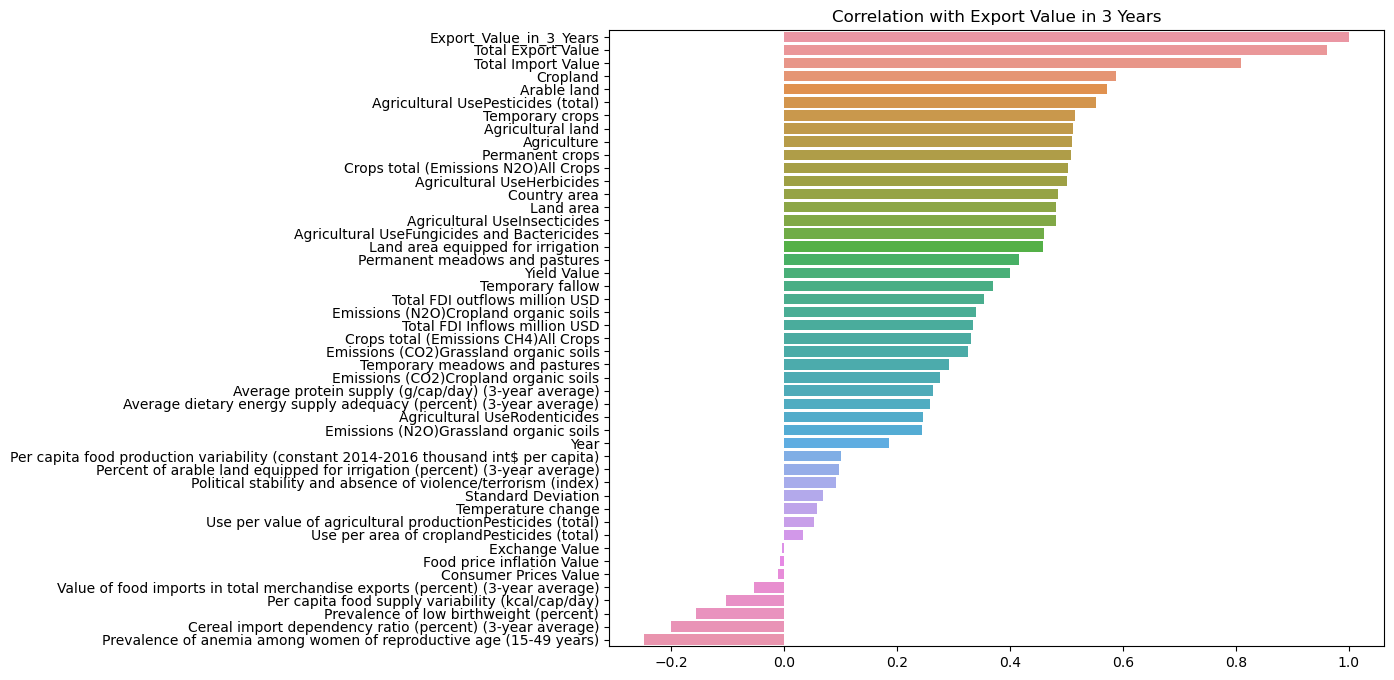

Relevant Features based on Correlation Analysis: ['Export_Value_in_3_Years', 'Total Export Value', 'Total Import Value', 'Cropland', 'Arable land', 'Agricultural UsePesticides (total)', 'Temporary crops', 'Agricultural land', 'Agriculture', 'Permanent crops', 'Crops total (Emissions N2O)All Crops', 'Agricultural UseHerbicides']


In [139]:
only_numeric_data = final_df_merged_cleanedd.select_dtypes(include=[np.number])
# Calculate the correlation matrix
correlation_matrix = only_numeric_data.corr()

# Get the correlation of each feature with the target
correlation_with_target = correlation_matrix['Export_Value_in_3_Years'].sort_values(ascending=False)

# Plot the correlations with the target
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title('Correlation with Export Value in 3 Years')
plt.show()

# Select features with high correlation (absolute value > 0.5 for example)
relevant_features = correlation_with_target[abs(correlation_with_target) > 0.5].index.tolist()
print("Relevant Features based on Correlation Analysis:", relevant_features)

In [140]:
correlation_with_target

Export_Value_in_3_Years                                                                 1.000000
Total Export Value                                                                      0.961823
Total Import Value                                                                      0.809837
Cropland                                                                                0.587885
Arable land                                                                             0.571540
Agricultural UsePesticides (total)                                                      0.553149
Temporary crops                                                                         0.514624
Agricultural land                                                                       0.511269
Agriculture                                                                             0.510543
Permanent crops                                                                         0.508985
Crops total (Emissions N2O)All

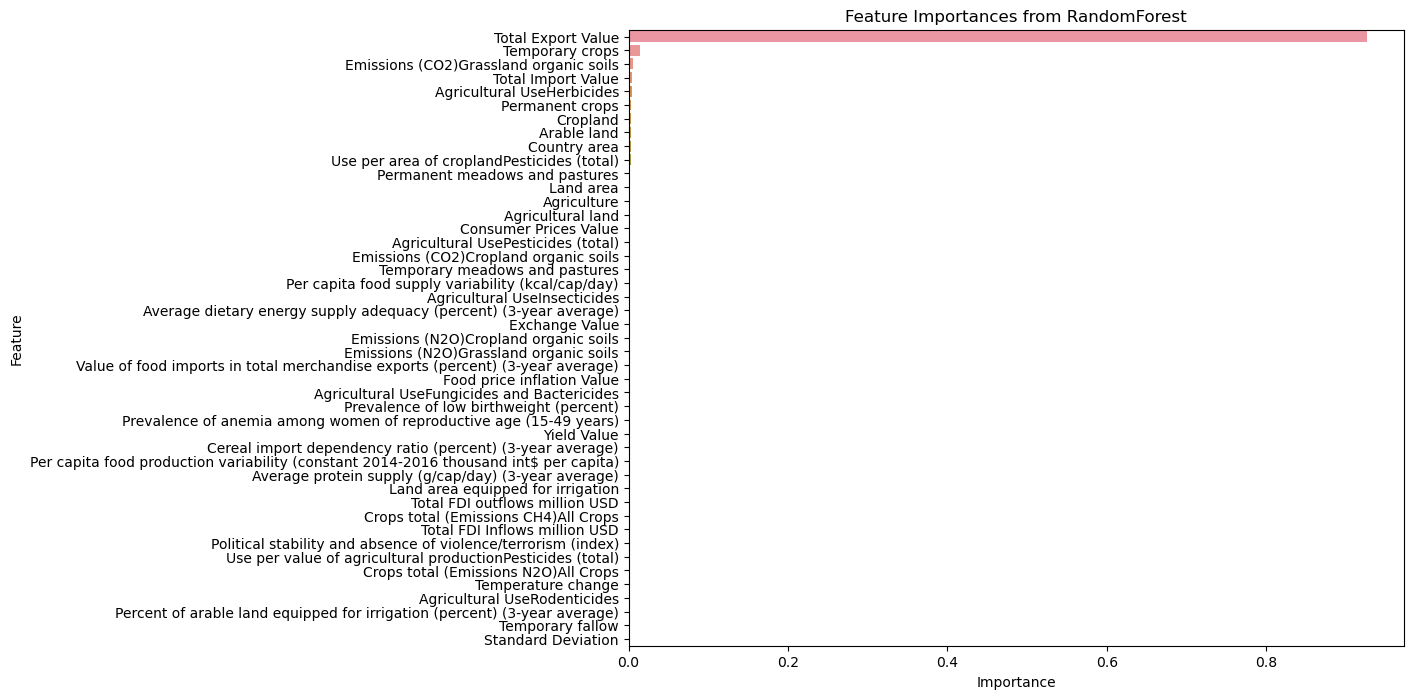

Top Features based on RandomForest Feature Importance: ['Total Export Value', 'Temporary crops', 'Emissions (CO2)Grassland organic soils', 'Total Import Value', 'Agricultural UseHerbicides', 'Permanent crops', 'Cropland', 'Arable land', 'Country area', 'Use per area of croplandPesticides (total)']


In [141]:
# Features and target variable
features = [col for col in final_df_merged_cleanedd.columns if col not in ['Area', 'Year', 'Export_Value_in_3_Years']]
X = final_df_merged_cleanedd[features]
y = final_df_merged_cleanedd['Export_Value_in_3_Years']

# Train a RandomForest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title('Feature Importances from RandomForest')
plt.show()

# Select top N features (e.g., top 10)
top_features = feature_importance_df.head(10)['Feature'].tolist()
print("Top Features based on RandomForest Feature Importance:", top_features)

In [142]:
feature_importance_df

,Feature,Importance
1,Total Export Value,0.926398
35,Temporary crops,0.014439
8,Emissions (CO2)Grassland organic soils,0.004968
0,Total Import Value,0.004289
39,Agricultural UseHerbicides,0.003637
33,Permanent crops,0.003453
30,Cropland,0.002868
28,Arable land,0.002528
29,Country area,0.002474
43,Use per area of croplandPesticides (total),0.002360


In [143]:
# Define the model
base_model = LinearRegression()

# Perform RFE
selector = RFE(base_model, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

# Get the ranking of features
ranking = selector.ranking_
rfe_features = np.array(features)[ranking == 1]

print("Top Features based on RFE:", rfe_features)

Top Features based on RFE: ['Crops total (Emissions N2O)All Crops'
 'Emissions (N2O)Cropland organic soils'
 'Emissions (N2O)Grassland organic soils'
 'Average dietary energy supply adequacy (percent) (3-year average)'
 'Percent of arable land equipped for irrigation (percent) (3-year average)'
 'Political stability and absence of violence/terrorism (index)'
 'Prevalence of anemia among women of reproductive age (15-49 years)'
 'Temperature change' 'Standard Deviation'
 'Use per value of agricultural productionPesticides (total)']


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - loss: 2497854.2500 - val_loss: 2478081.2500
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - loss: 2592225.0000 - val_loss: 2404669.0000
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 2663378.5000 - val_loss: 2226017.7500
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - loss: 2102335.5000 - val_loss: 1780314.8750
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1728446.8750 - val_loss: 1572919.6250
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 1451682.3750 - val_loss: 1400627.8750
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 1274613.0000 - val_loss: 1228216.5000
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - loss: 1061491.3750 - val_loss: 1028866.0000
Epoch 9/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 993521.1250 - val_loss: 873466.3125
Epoch 10/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - loss: 837578.0625 - val_loss: 849507.1875
Epoch 11/200
62/62 ━━━━━━

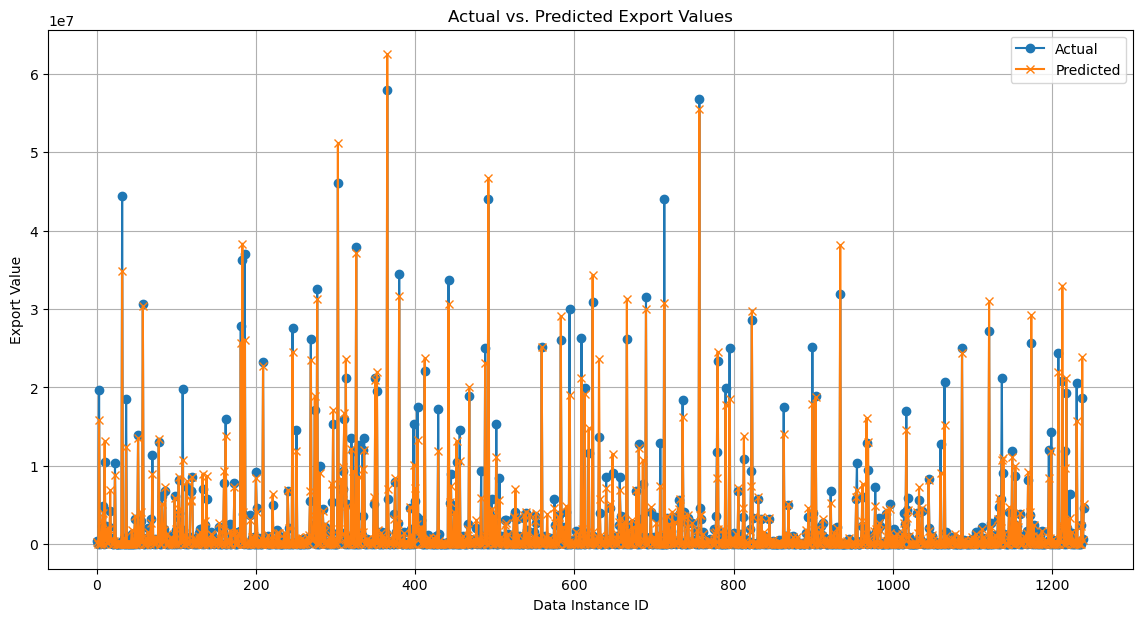

In [147]:
# Define the combined relevant features list
relevant_features = list(set([
    'Total Export Value', 'Total Import Value', 'Cropland', 'Arable land', 'Agricultural UsePesticides (total)', 
    'Temporary crops'
]))

# Features and target variable
X = final_df_merged_cleanedd[relevant_features]
y = final_df_merged_cleanedd['Export_Value_in_3_Years']


# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Prepare the output DataFrame
data_instance_ids = range(1, len(y_test) + 1)
output_df = pd.DataFrame({
    'Data_Instance_ID': data_instance_ids,
    'Actual': y_test.values,
    'Prediction': y_pred.flatten()
})


# Line Plot
plt.figure(figsize=(14, 7))
plt.plot(data_instance_ids, y_test, label='Actual', marker='o')
plt.plot(data_instance_ids, y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Export Values')
plt.xlabel('Data Instance ID')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()



In [144]:
most_relevant_col = final_df_merged_cleanedd[['Area', 'Year', 'Total Export Value', 'Total Import Value',  'Cropland', 'Arable land', 'Agricultural UsePesticides (total)', 
    'Temporary crops']]
most_relevant_col

,Area,Year,Total Export Value,Total Import Value,Cropland,Arable land,Agricultural UsePesticides (total),Temporary crops
0,Afghanistan,1991,51858.00,87160.00,8030.0,7910.0,307.98,2502.0000
1,Afghanistan,1992,19062.00,95105.00,8030.0,7910.0,307.98,2502.0000
2,Afghanistan,1993,21324.00,86236.00,7934.0,7824.0,307.98,2502.0000
3,Afghanistan,1994,26907.00,69697.00,7813.0,7703.0,307.98,2502.0000
4,Afghanistan,1995,24240.00,143826.00,7763.0,7653.0,307.98,2502.0000
...,...,...,...,...,...,...,...,...
6200,Zimbabwe,2018,992306.64,523893.97,4100.0,4000.0,2185.07,3058.6708
6201,Zimbabwe,2019,949699.72,269651.12,4100.0,4000.0,2185.07,3072.4622
6202,Zimbabwe,2020,934734.08,837292.32,4100.0,4000.0,2185.07,3088.3131
6203,Zimbabwe,2021,919869.29,781779.37,4100.0,4000.0,2185.07,3114.8473


In [145]:
df_encoded = pd.get_dummies(most_relevant_col, columns=['Area'])
df_encoded

,Year,Total Export Value,Total Import Value,Cropland,Arable land,Agricultural UsePesticides (total),Temporary crops,Area_Afghanistan,Area_Albania,Area_Algeria,...,Area_United Republic of Tanzania,Area_United States of America,Area_Uruguay,Area_Uzbekistan,Area_Vanuatu,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Yemen,Area_Zambia,Area_Zimbabwe
0,1991,51858.00,87160.00,8030.0,7910.0,307.98,2502.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1992,19062.00,95105.00,8030.0,7910.0,307.98,2502.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1993,21324.00,86236.00,7934.0,7824.0,307.98,2502.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1994,26907.00,69697.00,7813.0,7703.0,307.98,2502.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1995,24240.00,143826.00,7763.0,7653.0,307.98,2502.0000,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,2018,992306.64,523893.97,4100.0,4000.0,2185.07,3058.6708,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6201,2019,949699.72,269651.12,4100.0,4000.0,2185.07,3072.4622,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6202,2020,934734.08,837292.32,4100.0,4000.0,2185.07,3088.3131,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6203,2021,919869.29,781779.37,4100.0,4000.0,2185.07,3114.8473,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Epoch 1/200


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2684632.7500 - val_loss: 968237.5625
Epoch 2/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 846451.7500 - val_loss: 499105.1250
Epoch 3/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 517030.5000 - val_loss: 421760.0938
Epoch 4/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 499335.5625 - val_loss: 458811.6562
Epoch 5/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - loss: 468326.6562 - val_loss: 433547.4375
Epoch 6/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 455303.6875 - val_loss: 399774.1875
Epoch 7/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 494481.6250 - val_loss: 468488.5625
Epoch 8/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - loss: 530895.8750 - val_loss: 411887.8125
Epoch 9/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 438405.8750 - val_loss: 402862.0625
Epoch 10/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - loss: 444907.9688 - val_loss: 408602.9062
Epoch 11/200
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s

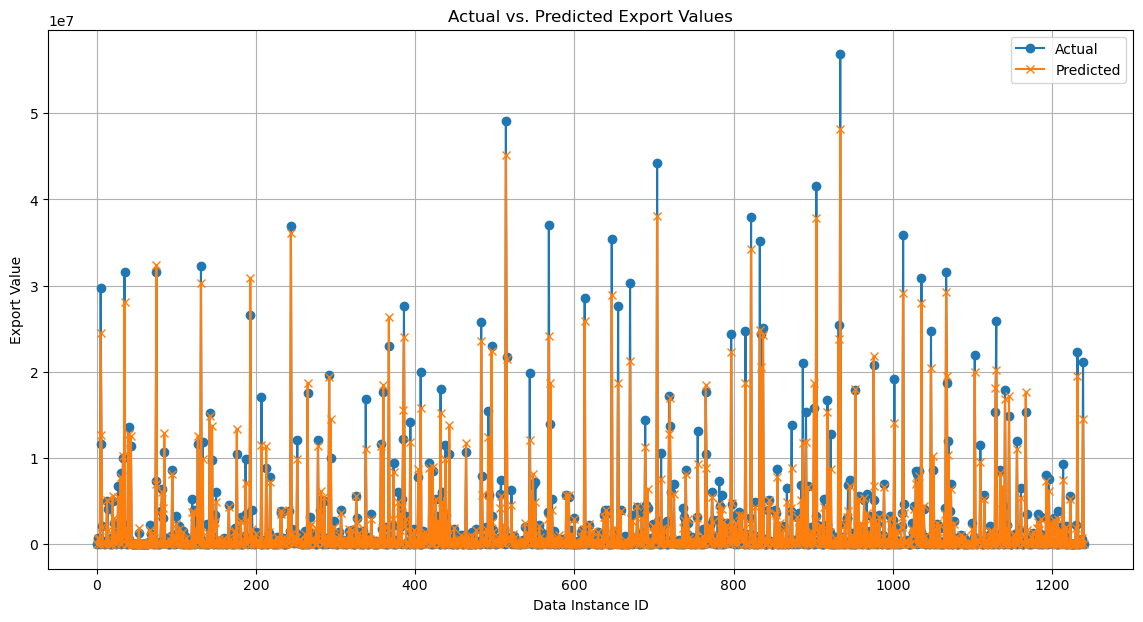

In [165]:
# Define the combined relevant features list
# relevant_features = list(set([
#     'Total Export Value', 'Total Import Value', 'Cropland', 'Arable land', 'Agricultural UsePesticides (total)', 
#     'Temporary crops'
# ]))

# Features and target variable
X = df_encoded


# X = final_df_merged_cleanedd[relevant_features]
y = final_df_merged_cleanedd['Export_Value_in_3_Years']


# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

# Define the MLP model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
optimizer = Adam(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Square Error: {rmse}')
print(f'R² Score: {r2}')

# Prepare the output DataFrame
data_instance_ids = range(1, len(y_test) + 1)
output_df = pd.DataFrame({
    'Data_Instance_ID': data_instance_ids,
    'Actual': y_test.values,
    'Prediction': y_pred.flatten()
})

# Save to CSV
output_df.to_csv('model_outputs.csv', index=False, header=True)
# Line Plot
plt.figure(figsize=(14, 7))
plt.plot(data_instance_ids, y_test, label='Actual', marker='o')
plt.plot(data_instance_ids, y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Export Values')
plt.xlabel('Data Instance ID')
plt.ylabel('Export Value')
plt.legend()
plt.grid(True)
plt.show()

